# First approach on ideal modelling



1. Implementing all necessary packages

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS, origin_like,D_Matrix,Gammaij,vpure,DIdeal2DReal,dlnai_dlnxi,lngi,Diffusion_MS_iter,time_dep_surface,massbalancecorrection
import matplotlib.pyplot as plt


Mi=np.asarray([357.79,65000,18.015])

nc=len(Mi)
T=298.15
p=1E5
kij=D_Matrix(np.asarray([-0.0621,-0.025,-0.156]),nc)
par={"mi":np.asarray([14.283,2420.99,1.2046 ]),
"si": np.asarray([3.535,2.947, 2.797059952]),
"ui" :np.asarray([262.79,205.27,353.95 ]),
"eAi" :np.asarray([886.4,0.,2425.67 ]),
"kAi":np.asarray([ 0.02,0.02,0.04509 ]),
"NAi":np.asarray([3.,653., 1.]),
"Mi": Mi,
"kij":kij,
"kijA":np.asarray([[0.]])}

#NAP PVPVA
# Mi=np.asarray([230.26,65000.,18.015])
# kij=D_Matrix(np.asarray([-0.0574,0.00648,-0.156]),nc)
# par={"mi":np.asarray([ 8.105152,2420.99,1.2046]),
# "si": np.asarray([ 2.939,2.947,2.797059952]),
# "ui" :np.asarray([ 229.45,205.27,353.95]),
# "eAi" :np.asarray([ 934.2,0.,2425.67]),
# "kAi":np.asarray([0.02, 0.02,0.04509]),
# "NAi":np.asarray([2.,653., 1.]),
# "Mi": Mi,
# "kij":kij,
# "kijA":np.asarray([[0.]])}
# # #RIT PVPVA
# Mi= np.asarray([720.948,65000,18.02])
# kij=D_Matrix(np.asarray([0.019,-0.041110999999999995,-0.156]),nc)
# # kij=D_Matrix(np.asarray([0.019,-0.0605,-0.156]),nc)
# par={"mi":np.asarray([15.88464728,2420.99,1.2046 ]),
# "si": np.asarray([3.90027,2.947, 2.797059952]),
# "ui" :np.asarray([305.787,205.27,353.95 ]),
# "eAi" :np.asarray([1040.969,0.,2425.67 ]),
# "kAi":np.asarray([ 0.02,0.02,0.04509 ]),
# "NAi":np.asarray([4.,653., 1.]),
# "Mi": Mi,
# "kij":kij,
# "kijA":np.asarray([[0.]])}
# # NIF PVPVA
# Mi=np.asarray([346.339,65000,18.015])
# kij=D_Matrix(np.asarray([-0.0048,0.0095,-0.156]),nc)
# par={"mi":np.asarray([8.12857633,2420.99,1.2046 ]),
# "si": np.asarray([3.581,2.947, 2.797059952]),
# "ui" :np.asarray([309.440,205.27,353.95 ]),
# "eAi" :np.asarray([1221.58,0.,2425.67 ]),
# "kAi":np.asarray([ 0.02,0.02,0.04509 ]),
# "NAi":np.asarray([2.,653., 1.]),
# "Mi": Mi,
# "kij":kij,
# "kijA":np.asarray([[0.]])}

# # Ventoclax PVPVA
# Mi=np.asarray([868.44,65000,18.015])
# kij=D_Matrix(np.asarray([-0.006423604999999999,-0.00283,-0.156]),nc)
# par={"mi":np.asarray([34.19916,2420.99,1.2046 ]),
# "si": np.asarray([2.546,2.947, 2.797059952]),
# "ui" :np.asarray([233.7,205.27,353.95 ]),
# "eAi" :np.asarray([0.,0.,2425.67 ]),
# "kAi":np.asarray([ 0.,0.02,0.04509 ]),
# "NAi":np.asarray([1.,653., 1.]),
# "Mi": Mi,
# "kij":kij,
# "kijA":np.asarray([[0.]])}

# # celecoxib PVPVA
# Mi=np.asarray([381.37,65000,18.015])
# kij=D_Matrix(np.asarray([0.02078,0.01865,-0.156]),nc)
# par={"mi":np.asarray([8.06559413,2420.99,1.2046 ]),
# "si": np.asarray([4.008,2.947, 2.797059952]),
# "ui" :np.asarray([416.4157,205.27,353.95 ]),
# "eAi" :np.asarray([936.229,0.,2425.67 ]),
# "kAi":np.asarray([ 0.02,0.02,0.04509 ]),
# "NAi":np.asarray([2.,653., 1.]),
# "Mi": Mi,
# "kij":kij,
# "kijA":np.asarray([[0.]])}



vpures=vpure(p,T,**par)
par["vpure"]=vpures
lngi_fun=lambda wi :lngi(T,wi,**par)
dlnai_dlnwi_fun=lambda wi: dlnai_dlnxi(T,np.ascontiguousarray(wi),**par)
Gammaij_fun=lambda wi: Gammaij(T,wi,par)
# plt.rcdefaults()




In [2]:
import numpy as np
class L1_DL03:
    texp=np.array([0.,5.,15.,30.,60.,90.,120.,150.,180.,210.,240.,270.,300.])*60
    A220=np.array([0.,0.022733333,0.036733333,0.055833333,0.0921,0.1274,0.160233333,0.194,0.224,0.251866667,0.2821,0.300966667,0.319133333])
    A240=np.array([0.,0.002866667,0.005266667,0.0097,0.0187,0.0284,0.038,0.048566667,0.059633333,0.069633333,0.0818,0.0891,0.098233333])
    SWA220=np.array([0.,0.008163469,0.003674537,0.002653719,0.005040503,0.007566153,0.005753453,0.005614861,0.006766092,0.007559688,0.010546405,0.006001296,0.006235561])
    SWA240=np.array([0.,0.000478423,0.000817856,0.000163299,0.001576917,0.002111871,0.002299275,0.002169997,0.003166842,0.003512201,0.005441201,0.003102687,0.002245489])
    mpol0=43.491
    mIND0=18.639



class L25_DL03:
    texp=np.array([0.,5.,15.,30.,60.,90.,120.,150.,180.,210.,240.,270.,300.])*60
    A220=np.array([0.,0.012333333,0.028233333,0.047333333,0.074366667,0.088933333,0.098466667,0.107233333,0.114366667,0.122033333,0.129,0.135933333,0.1439])
    A240=np.array([0.,0.002433333,0.0053,0.0084,0.016133333,0.021966667,0.027533333,0.032833333,0.037666667,0.043166667,0.048733333,0.0533,0.0586])
    SWA220=np.array([0.,0.002311325,0.002819377,0.003368811,0.005216214,0.003561211,0.003536791,0.0041652,0.004375944,0.004847221,0.00512315,0.004349202,0.005273203])
    SWA240=np.array([0.,0.000249444,0.000163299,0.00142361,0.000946338,0.000731817,0.000579272,0.000713364,0.000857645,0.001730767,0.001391242,0.00094163,0.000355903])
    mpol0=10.871 #/mg
    mIND0=4.659#/mg

class L1_DL05:
    texp=np.array([0.,5.,15.,30.,60.,90.,120.,150.,180.,210.,240.,270.,300.])*60
    A220=np.array([0.,0.007766667,0.0134,0.020866667,0.035966667,0.044366667,0.0584,0.0665,0.0748,0.0896,0.098966667,0.1101,0.121])
    A240=np.array([0.,0.003733333,0.006966667,0.0115,0.0214,0.0272,0.037366667,0.0433,0.0496,0.06,0.066733333,0.074966667,0.082733333])
    SWA220=np.array([0.,4.71405E-05,0.000244949,0.000857645,0.002007209,0.002315647,0.001899123,0.001023067,0.000648074,0.003412721,0.004134677,0.004892852,0.004891489])
    SWA240=np.array([0.,0.00020548,0.00020548,0.000571548,0.00143527,0.001867262,0.001400793,0.000828654,0.000734847,0.002491318,0.003026916,0.003759728,0.003521679])
    mpol0=31.65#/mg
    mIND0=31.65#/mg

class L25_DL05:
    texp=np.array([0.,5.,15.,30.,60.,90.,120.,150.,180.,210.,240.,270.,300.])*60
    A220=np.array([0.,0.006666667,0.0121,0.016633333,0.0275,0.0367,0.046,0.054033333,0.0622,0.069633333,0.077666667,0.0855,0.093766667])
    A240=np.array([0.,0.0029,0.0058,0.007266667,0.0164,0.022766667,0.029633333,0.035566667,0.0415,0.046833333,0.0526,0.058233333,0.064633333])
    SWA220=np.array([0.,0.000793025,0.001134313,0.001367073,0.000787401,0.000637704,0.000883176,0.001367073,0.000294392,0.001020893,0.001371941,0.00247521,0.002113975])
    SWA240=np.array([0.,0.000294392,0.000355903,0.001078064,0.000216025,0.000262467,0.000946338,0.000703957,0.000616441,0.000987702,0.001208305,0.002182252,0.002595295])
    mpol0=7.915#/mg
    mIND0=7.915#/mg

class L1_DL07:
    texp=np.array([0.,5.,15.,30.,60.,90.,120.,150.,180.,210.,240.,270.,300.])*60
    A220=np.array([0.,0.0075,0.0108,0.0242,0.0323,0.04425,0.05615,0.06915,0.0795,0.0921,0.10345,0.11425,0.12255])
    A240=np.array([0.,0.00405,0.0073,0.0181,0.02305,0.0316,0.04035,0.04985,0.05755,0.06705,0.075,0.08175,0.08925])
    SWA220=np.array([0.,0.0004,0.0003,0.0044,0.0013,0.00205,0.00295,0.00215,0.0042,0.0051,0.00285,0.00445,0.00555])
    SWA240=np.array([0.,0.00025,0,0.0045,0.00065,0.0008,0.00155,0.00125,0.00255,0.00315,0.002,0.00445,0.00365])
    mpol0=19.362#/mg
    mIND0=45.178#/mg
class L25_DL07:
    texp=np.array([0.,5.,15.,30.,60.,90.,120.,150.,180.,210.,240.,270.,300.])*60
    A220=np.array([0.,0.00195,0.007,0.00905,0.0165,0.03445,0.04165,0.05105,0.0583,0.068,0.08015,0.08465,0.0958])
    A240=np.array([0.,0.0011,0.0052,0.00615,0.0121,0.0257,0.03075,0.0364,0.043,0.05055,0.05815,0.06475,0.0716])
    SWA220=np.array([0.,0.00025,0.001,0.00095,0.0023,0.00265,0.00245,0.00305,0.0042,0.005,0.00595,0.00445,0.0047])
    SWA240=np.array([0.,0.0002,0.0006,0.00075,0.0019,0.0016,0.00155,0.0031,0.0028,0.00275,0.00315,0.00265,0.0023])
    mpol0=4.8#/mg
    mIND0=11.2#/mg
class L1_DL01:

    texp=np.asarray([0.,5.,15.,30.,60.,90.,120,150.,180.,210.])*60
    A220=np.array([0,0.2741,0.6286,1.0161,1.0369,1.0362,1.0725,1.0559,1.0541,1.0559])
    A240=np.array([0,0.1351,0.3128,0.5048,0.5184,0.5188,0.544,0.5335,0.5334,0.5335])
    SWA220=np.array([0,0.001,0.0013,0.002,0.002,0.001,0.003,0.007,0.003,0.003])
    SWA240=np.array([0,0.001,0.0014,0.002,0.001,0.001,0.001,0.002,0.001,0.003])
    mpol0=56.8-5.68#/mg
    mIND0=5.68#/mg

class L25_DL01:
    texp=np.asarray([0.,5.,15.,30.,60.,90.,120])*60
    A220=np.array([0,0.1329,0.2553,0.2513,0.2539,0.256,0.2545])
    A240=np.array([0,0.063,0.1256,0.1225,0.1259,0.1272,0.1262])
    SWA220=np.array([0,0.001,0.001,0.002,0.002,0.001,0.003])
    SWA240=np.array([0,0.001,0.001,0.001,0.001,0.002,0.003])
    mpol0=13.71-1.371#/mg
    mIND0=1.371#/mg
class L1_DL01_2:
    # texp=np.asarray([0.,5.,15.,30.,60.,90.,120,150.,180.])*60
    # A220=np.array([0,0.1259,0.5324,0.9907,1.0996,1.0894,1.1134,1.1196,1.1237])
    # A240=np.array([0,0.059,0.2598,0.4818,0.5371,0.5316,0.5471,0.5499,0.5529])
    # SWA220=np.array([0,0.001,0.0013,0.002,0.002,0.002,0.002,0.002,0.002])
    # SWA240=np.array([0,0.001,0.0014,0.002,0.002,0.002,0.002,0.002,0.002])

    texp=np.asarray([0.,5.,15.,30.,60.,90.,120.])*60
    A220=np.array([0,0.1259,0.5324,0.9907,1.0996,1.1134,1.1179])
    A240=np.array([0,0.059,0.2598,0.4818,0.5371,0.5471,0.5488])
    SWA220=np.array([0.,0.018525,0.012025,0.003175,0.0078375,0.00965,0.005675])
    SWA240=np.array([0.,0.0095125,0.006625,0.002875,0.0023375,0.0035375,0.0006])
    mpol0=60.150-6.0150#/mg
    mIND0=6.0150#/mg

# class L1_DL01_2:
#     # texp=np.asarray([0.,5.,15.,30.,60.,90.,120,150.,180.])*60
#     # A220=np.array([0,0.1259,0.5324,0.9907,1.0996,1.0894,1.1134,1.1196,1.1237])
#     # A240=np.array([0,0.059,0.2598,0.4818,0.5371,0.5316,0.5471,0.5499,0.5529])
#     # SWA220=np.array([0,0.001,0.0013,0.002,0.002,0.002,0.002,0.002,0.002])
#     # SWA240=np.array([0,0.001,0.0014,0.002,0.002,0.002,0.002,0.002,0.002])

#     texp=np.asarray([0.,5.,15.,30.,60.,90.,120.])*60
#     A220=np.array([0,0.2,0.5805,1.0034,1.06825,1.0748,1.0952])
#     A240=np.array([0,0.09705,0.2863,0.4933,0.52775,0.53295,0.5464])
#     SWA220=np.array([0,0.0741,0.0481,0.0127,0.03135,0.0386,0.0227])
#     SWA240=np.array([0,0.03805,0.0265,0.0115,0.00935,0.01415,0.0024])
#     mpol0=58.475-5.8475#/mg
#     mIND0=5.8475#/mg


# wAPIkalib=np.array([2.66092E-06,1.33013E-06,1.13843E-06,8.9315E-07,5.36744E-07,3.01435E-07])
wAPIkalib=np.array([2.25E-06,1.12E-06,9.62E-07,7.55E-07,4.54E-07,2.55E-07])
E220APIkalib=np.array([0.1362,0.0647,0.0574,0.0523,0.0298,0.0197])
E240APIkalib=np.array([0.1043,0.0494,0.0436,0.0353,0.0222,0.0139])

wPolkalib=np.array([0.000106537,5.31318E-05,4.55943E-05,3.54301E-05,2.09307E-05,1.18219E-05])#[1:]
E220Polkalib=np.array([0.411366667,0.199733333,0.1716,0.125233333,0.0733,0.0392])#[1:]
E240Polkalib=np.array([0.002833333,0.0017,0.0015,0.001066667,0.0012,0.0012])#[1:]






def get_conc(meas):
    epol220=3849.3
    epol220=3798.5
    # epol220=wPolkalib

    epol240=152
    epol240=25
    eIND220=8290
    eIND240=6080
    # epol220=3469.4
    eIND220=34438
    eIND240=25860
    
    eIND220=51444
    eIND240=38906
    
    eIND220=np.linalg.lstsq(np.transpose([wAPIkalib]),E220APIkalib)[0]
    eIND240=np.linalg.lstsq(np.transpose([wAPIkalib]),E240APIkalib)[0]
    epol220=np.linalg.lstsq(np.transpose([wPolkalib]),E220Polkalib)[0]
    epol240=np.linalg.lstsq(np.transpose([wPolkalib]),E240Polkalib)[0]
    
    mw=500000#/mg
    denom=epol220*eIND240-eIND220*epol240
    wpol=(meas.A220*eIND240-meas.A240*eIND220)/denom
    wpolstd=meas.SWA220*eIND240/denom+meas.SWA240*eIND220/denom
    wIND=(-meas.A220*epol240+meas.A240*epol220)/denom
    wINDstd=meas.SWA220*epol240/denom+meas.SWA240*epol220/denom
    relpol=wpol*mw/meas.mpol0
    relpolstd=wpolstd*mw/meas.mpol0
    relIND=wIND*mw/meas.mIND0
    relINDstd=wINDstd*mw/meas.mIND0
    texp=meas.texp
    return texp,relIND,relpol,relINDstd,relpolstd,meas.mIND0,meas.mpol0
releaseL1D03=get_conc(L1_DL03)
releaseL25D03=get_conc(L25_DL03)
releaseL1D05=get_conc(L1_DL05)
releaseL25D05=get_conc(L25_DL05)
releaseL1D07=get_conc(L1_DL07)
releaseL25D07=get_conc(L25_DL07)

releaseL1D01=get_conc(L1_DL01)
releaseL1D01=get_conc(L1_DL01_2)


releaseL25D01=get_conc(L25_DL01)



Calculate the values for the concentrations inside the ASD

In [3]:
import numpy as np
from numpy import array
import scipy as sp
from diffusionpy import Diffusion_MS, origin_like
import matplotlib.pyplot as plt
plt.rcdefaults()
from scipy.optimize import curve_fit
import xlwings as xw
import pandas as pd



# wINDL1D03= array([0,0.009181653,0.0177953,0.034951592,0.070241928,0.10897447,0.147694902,0.190751187,0.236832633,0.278332874,0.329500822,0.360067785,0.399312757])
# wPolL1D03= array([0,0.059422662,0.093285906,0.134496465,0.210240881,0.279921058,0.342245265,0.403355101,0.450422919,0.495347547,0.538417477,0.566553258,0.584588665])
# wINDL1D03std= array([0,0.001451145,0.00415476,0.000663953,0.006522322,0.008558609,0.010026638,0.009174558,0.013618213,0.015034537,0.02343624,0.013395768,0.010040618])
# wPolL1D03std= array([0,0.024230181,0.013515878,0.00804284,0.01015533,0.015710411,0.013482369,0.009804874,0.010060662,0.009979979,0.010060793,0.006709524,0.01789644])
# releaseL1D03= (wINDL1D03,wPolL1D03,wINDL1D03std,wPolL1D03std)

# wINDL1D05= array([0,0.009410176,0.017678603,0.029318253,0.05486796,0.06988489,0.096282581,0.111698201,0.128099064,0.155054392,0.172529595,0.193932487,0.214079132])
# wPolL1D05=array([0,0.011608811,0.016921193,0.022497303,0.029443898,0.031577031,0.032319704,0.032362985,0.031105221,0.033793397,0.034599565,0.034197432,0.035543185])
# wINDL1D05std= array([0,0.000560189,0.000537907,0.001476605,0.003725247,0.004876758,0.003640909,0.002165298,0.002005926,0.006471779,0.007864117,0.009794778,0.009141576])
# wPolL1D05std=array([0,0.001058124,0.000200963,0.000353542,0.000973721,0.001014067,0.000128446,0.00066492,0.004708822,0.000536037,0.000214654,0.001354999,0.00122414])
# releaseL1D05= (wINDL1D05,wPolL1D05,wINDL1D05std,wPolL1D05std)

# wINDL1D07= array([0,0.007221897,0.01322377,0.032983559,0.041891356,0.057432596,0.073362409,0.090651557,0.10467906,0.121998596,0.136431097,0.14859674,0.162395207])
# wPolL1D07=np.fmax(array([0,0.01402405,0.006002394,-0.003397119,0.006180238,0.008251979,0.008035651,0.008368015,0.007312611,0.004808795,0.008426908,0.019746557,0.006089275]),0.)
# wINDL1D07std= array([0,0.000419246,0.002127135,0.012306831,0.002933558,0.006801236,0.005931839,0.003159799,0.005127166,0.00570793,0.000872312,0.011468922,0.004064765])
# wPolL1D07std=array([0,0.000450579,2.27907E-05,0.008323142,0.001151754,0.001383358,0.002757887,0.002241501,0.004586793,0.005672742,0.003631224,0.00822315,0.00660049])
# releaseL1D07=(wINDL1D07,wPolL1D07,wINDL1D07std,wPolL1D07std)

# wINDL25D03= array([0,0.036309766,0.078076186,0.121838247,0.246193763,0.344287397,0.441114092,0.533530735,0.618444647,0.715402747,0.814120221,0.894206636,0.987212613])
# wPolL25D03= array([0,0.113853179,0.265286777,0.453114093,0.661347233,0.744859965,0.769400541,0.788850912,0.795710088,0.797825237,0.789952452,0.798877619,0.808225124])/0.808225124
# wINDL25D03std= array([0,0.006271824,0.001825683,0.024436898,0.013830321,0.011676744,0.008950643,0.011072684,0.014560113,0.029969001,0.022862373,0.015786776,0.004717131])
# wPolL25D03std= array([0,0.033231186,0.033365266,0.024528228,0.049659662,0.035785949,0.037507253,0.043661365,0.049105508,0.046352837,0.046324593,0.046667048,0.06235364])
# releaseL25D03=(wINDL25D03,wPolL25D03,wINDL25D03std,wPolL25D03std)

# wINDL25D05= array([0,0.028954769,0.05844434,0.072584396,0.16816767,0.234092222,0.305464031,0.36713594,0.428750032,0.484093372,0.543935074,0.602399336,0.669094644])
# wPolL25D05=array([0,0.047049142,0.072706172,0.116650529,0.089132529,0.098136881,0.09705092,0.096067659,0.097397058,0.100196595,0.103154937,0.10579757,0.097824977])
# wINDL25D05std= array([0,0.003522837,0.003774463,0.011749301,0.002210631,0.002777944,0.010035501,0.007283635,0.006671305,0.010423074,0.01273165,0.022895689,0.027583796])
# wPolL25D05std=array([0,0.019906882,0.018669455,0.0316355,0.011780918,0.010170854,0.009779304,0.015212069,0.011124419,0.008187653,0.012227301,0.009782127,0.024798373])
# releaseL25D05=(wINDL25D05,wPolL25D05,wINDL25D05std,wPolL25D05std)

# wINDL25D07= array([0,0.007938884,0.038209011,0.044953191,0.088844605,0.188885476,0.225869139,0.266834874,0.315831838,0.371450406,0.426706215,0.476545891,0.526287839])
# wPolL25D07=np.fmax(array([0,0.012875203,-0.002577863,0.019007036,5.17454E-05,-0.016920754,-0.007928811,0.040587231,-0.009436484,-0.026434857,0.024689625,-0.103987138,-0.052215839]),0)
# wINDL25D07std= array([0,0.00147547,0.004349801,0.005529184,0.014039952,0.011604577,0.011277845,0.023122605,0.020442078,0.019808905,0.022621948,0.019201407,0.016408656])
# wPolL25D07std=array([0,0.00064917,0.005202767,0.002076873,0.008312197,0.013397361,0.009627001,0.033658048,0.010932397,0.035763146,0.047335305,0.02393226,0.044731569])
# releaseL25D07=(wINDL25D07,wPolL25D07,wINDL25D07std,wPolL25D07std)


expdata={'L:0.25_DL:0.1':releaseL25D01,'L:1_DL:0.1':releaseL1D01,'L:1_DL:0.3':releaseL1D03,'L:0.25_DL:0.3':releaseL25D03,'L:1_DL:0.5':releaseL1D05,'L:0.25_DL:0.5':releaseL25D05,'L:1_DL:0.7':releaseL1D07,'L:0.25_DL:0.7':releaseL25D07}

# Dvecoptdic={'DL:0.1':np.asarray([1.00000000e-10,3.395e-10,4.419e-10]),'DL:0.3':np.asarray([1.500000e-12,3.111e-13,4.543e-10]),'DL:0.5':np.asarray([4.000000e-11,9.111e-13,2.543e-14])/50,'DL:0.7':np.asarray([1.0000000e-11,8.352e-13,7.589e-14])/50}

Dvecoptdic={'DL:0.1':np.asarray([1.00000000e-10,3.395e-10,4.419e-10]),'DL:0.3':np.asarray([2.700000e-12,9.111e-13,8.543e-10]),'DL:0.5':np.asarray([0.50000e-13,2.111e-14,12.543e-13]),'DL:0.7':np.asarray([0.50000e-13,2.111e-14,12.543e-13])}
# Dvecoptdic={
# 'DL:0.1':np.asarray([4.42291718e-11, 3.99847916e-10, 3.05740213e-10]),
# 'DL:0.3':np.asarray([3.26615271e-11, 1.34060391e-12, 1.35552170e-11]),
# 'DL:0.5':np.asarray([1.00000000e-14, 8.69066598e-14, 4.96233103e-13]),
# 'DL:0.7':np.asarray([1.00000000e-14, 7.37566398e-14, 1.58855407e-13])}

Dvecoptdic={
'DL:0.1':np.asarray([4.42291718e-11, 3.99847916e-10, 3.05740213e-10]),
'DL:0.3':np.asarray([2.700000e-12,9.111e-13,8.543e-10]),
'DL:0.5':np.asarray([1.00000000e-14, 8.69066598e-14, 4.96233103e-13]),
'DL:0.7':np.asarray([1.00000000e-14, 7.37566398e-14, 1.58855407e-13])}
Dvecoptdic={
'DL:0.1':np.asarray([4.42291718e-11, 3.99847916e-10, 3.05740213e-10]),
'DL:0.3':np.asarray([2.700000e-12,9.111e-13,8.543e-10]),
'DL:0.5':np.asarray([1.00000000e-14, 2.69066598e-14, 7.96233103e-13]),
'DL:0.7':np.asarray([1.00000000e-14, 2.37566398e-14, 3.58855407e-13])}
# Dvecoptdic={
# 'DL:0.1':np.asarray([4.42291718e-11, 9.99847916e-10, 3.05740213e-10]),
# 'DL:0.3':np.asarray([8.15278383e-10, 4.34763202e-13, 3.19197506e-12]),
# 'DL:0.5':np.asarray([6.25735803e-10, 4.14993037e-14, 8.25565314e-14]),
# 'DL:0.7':np.asarray([5.75006158e-10, 1.96490473e-14, 1.43586893e-14])}

# Dvecoptdic={'DL:0.1':np.asarray([1.00000000e-10,3.395e-10,4.419e-10]),
# 'DL:0.3':np.asarray([2.700000e-11,3.111e-11,8.543e-11]),
# 'DL:0.5':np.asarray([4.000000e-11,9.111e-11,2.543e-11]),
# 'DL:0.7':np.asarray([1.0000000e-11,8.352e-11,7.589e-11])}

# Dvecoptdic={'DL:0.1':np.asarray([1.00000000e-10,3.395e-10,4.419e-10]),'DL:0.3':np.asarray([5.00000000e-10,7.395e-11,8.419e-10])/50,'DL:0.5':np.asarray([4.000000e-11,9.111e-13,2.543e-14])/50,'DL:0.7':np.asarray([1.0000000e-11,8.352e-13,7.589e-14])/50}
# Dvecoptdic={'DL:0.3':np.asarray([3.00000000e-12,7.395e-13,4.419e-10]),'DL:0.5':np.asarray([3.00000000e-12,7.395e-14,4.419e-14]),'DL:0.7':np.asarray([3.00000000e-12,7.395e-14,4.419e-14])}
# Dvecoptdic={'DL:0.3':np.asarray([3.00000000e-13,1.395e-13,4.419e-13]),'DL:0.5':np.asarray([3.00000000e-10,1.395e-13,4.419e-10]),'DL:0.7':np.asarray([3.00000000e-10,1.395e-13,4.419e-10])}
mobile= np.asarray([True,True,True])

wi_8 =np.asarray([0.000001,0.000001,0.999998])
# wi_8 =np.asarray([0.3*0.8,0.7*0.8,0.2])
t=np.linspace(0,300*60,80)
dlggw=np.array([0.0, 0.2044388279901576, 0.2044388279901576, 0.20460170228428817, 0.20459024275399415, 0.20470544184201617, 0.2048557064695703, 0.20487124808909474, 0.20486066252490912, 0.20512498960965386, 0.2051215633729461, 0.20543371567329902, 0.20554909792507262, 0.2057981523829065, 0.2061439888298794, 0.20621920147791195, 0.20639018805477025, 0.20672642490355067, 0.20678147818847306, 0.207304654912431, 0.207544825489152, 0.20794290903729845, 0.20849622977148438, 0.20864301652178568, 0.2089951307317515, 0.209431001489082, 0.20954801019636854, 0.21030247449289344, 0.210740714515432, 0.21124219133424937, 0.21215791887343127, 0.21225317129142798, 0.21247372195796718, 0.21337304260809128, 0.21369507665015372, 0.21457846834655572, 0.21547056567744435, 0.21586554051123055, 0.21672159177005312, 0.21725597542717898, 0.2174847976195625, 0.21876371815836787, 0.21974819261887718, 0.22036776168468886, 0.2215835721328742, 0.22208801226584537, 0.22234879369057184, 0.22394938099280437, 0.22530681346067707, 0.22592805703744906, 0.2269912892371615, 0.2280568536067269, 0.22873618011403873, 0.23034528127890405, 0.23275108968564417, 0.2327818563278808, 0.2328258148480908, 0.23542831928956115, 0.23755166385718465, 0.23825237483931483, 0.2391191771798351, 0.24130857468495082, 0.24348272777432636, 0.24459531522638206, 0.24574567144371826, 0.24816015086306745, 0.251210232450916, 0.25201300598908, 0.2526739074247147, 0.2562213105300948, 0.2599016817994173, 0.26079964810361567, 0.26270412287635914, 0.26583051364683624, 0.2673896654385227, 0.2713768740261088, 0.27510907923864303, 0.2775199414361468, 0.2830201952648096, 0.2843777265821335, 0.29112868796385843, 0.2921017702687057, 0.2994275854848885, 0.3008905946826727, 0.3078977458099327, 0.31101052152918635, 0.3165083589137972, 0.32282799057724615, 0.32521755900651267, 0.3293184361941846, 0.3340730720947338, 0.3368960705565971, 0.3430599268841983, 0.349958342480494, 0.3520815597668425, 0.3540316061976244, 0.3612775114213267, 0.3667846301502527, 0.37049311523059225, 0.37556230013181763, 0.37979109780727927, 0.3820084817045537, 0.3892092718723026, 0.39613776334799344, 0.39860214272909256, 0.40373874536264226, 0.40808327707365094, 0.409599373035327, 0.4176820994660644, 0.4224042390124264, 0.4272679228724834, 0.43502068061426896, 0.43684221029736175, 0.44285295653830525, 0.4464854240743597, 0.4472895633515841, 0.45625473362296265, 0.45913762203249564, 0.46601940328596086, 0.47087717387417927, 0.47578028116623716, 0.48251532384749846, 0.4855381597457653, 0.4940586527190657, 0.49529377956344894, 0.5023462174401192, 0.5050954867732544, 0.5054456418222238, 0.5150201180320034, 0.5165896360157014, 0.5249450659196402, 0.5276781941075929, 0.534870722013429, 0.5387146625429393, 0.5447974499599764, 0.5497021655274059, 0.5547255874165453, 0.5606436221538272, 0.5646554478468325, 0.5715417620148916, 0.5745873221838277, 0.5823991394532645, 0.5845214803701632, 0.5932181443942518, 0.5944581757384815, 0.6040010241768162, 0.6043976331241961, 0.6092570692111055, 0.6144010690041645, 0.6147029999219722, 0.6244647753337212, 0.6253357047327431, 0.6345309527348615, 0.6359471473964404, 0.6445997186972832, 0.6465385000458219, 0.6546711668857197, 0.6571108743714257, 0.6647453962202462, 0.6676653120216487, 0.6748224942876851, 0.6782027977227355, 0.6849025417193049, 0.6887242610616963, 0.6949856126801129, 0.6992305800495473, 0.7050717753227073, 0.7097225844226158, 0.7151610922084504, 0.7202010587035237, 0.7252536206986061, 0.7306667450415235, 0.7353494133175716, 0.7411203458500554, 0.7454485180904513, 0.7515625262577931, 0.7555509788568483, 0.7619939163879741, 0.7656568355626657, 0.7724151134795442, 0.7757661245315693, 0.782826683862426, 0.7858788787176293, 0.7932291647981592, 0.7959951279404697, 0.8036230661962525, 0.8061148991042631, 0.8140088722156061, 0.8162382164017185, 0.8243870427596779, 0.8263651015041461, 0.8347580148732796, 0.8364955737386226, 0.845122204048272, 0.8466296502531125, 0.8554800054448132, 0.8567673461704651, 0.865831795034272, 0.8669086747320716, 0.8761779306694468, 0.8770536474318967, 0.8865187530872836, 0.8872022741414505, 0.896854586848822, 0.8973545632265871, 0.9071857412208163, 0.9075105216563703, 0.917512511003044, 0.9176701551048632, 0.9277238395589371, 0.9278339032949146, 0.9278351414076427, 0.938039935154653, 0.938151253339644, 0.9482484993246817, 0.9484648170156645, 0.9584596018671663, 0.9587759989320378, 0.9686732482892416, 0.9690849585511983, 0.978889443584166, 0.9793918486539515, 0.9891081922696041, 0.9896968156717153, 0.999329498423517, 1.0])
waterggw=np.array([0.999, 0.999, 0.5349194844875832, 0.53, 0.5222588149839946, 0.52, 0.5118515284569132, 0.51, 0.5095199273646583, 0.5, 0.4967783983456145, 0.49, 0.48392027886283207, 0.48, 0.4709368020266896, 0.47000000000000003, 0.4670289269235559, 0.45999999999999996, 0.45790474103153833, 0.44999999999999996, 0.4447635473241812, 0.43999999999999995, 0.4314619627521417, 0.43000000000000005, 0.4258239434581762, 0.42000000000000004, 0.418054472714686, 0.41000000000000003, 0.40450494705115553, 0.4, 0.39074084578774, 0.39, 0.3881596330970407, 0.38, 0.3768320845398204, 0.37, 0.3626752826275382, 0.36, 0.35400991264154513, 0.35, 0.3482554735696343, 0.33999999999999997, 0.3335484838601596, 0.32999999999999996, 0.3230545091580551, 0.31999999999999995, 0.31846051841767153, 0.30999999999999994, 0.30294985242833294, 0.30000000000000004, 0.2951271366504671, 0.29000000000000004, 0.28688473928243813, 0.28, 0.27011952383150634, 0.27, 0.2698404164893918, 0.26, 0.2524083626654639, 0.25, 0.24723728927593802, 0.24, 0.23332880650082158, 0.22999999999999998, 0.22684294342285216, 0.21999999999999997, 0.21206188229418488, 0.20999999999999996, 0.20846595503894336, 0.19999999999999996, 0.19200215040520482, 0.18999999999999995, 0.18621544129510564, 0.17999999999999994, 0.17723072939562956, 0.17000000000000004, 0.1639679772237297, 0.16000000000000003, 0.15200397704678803, 0.15000000000000002, 0.14127322268207476, 0.14, 0.1316765301401341, 0.13, 0.12308549291337512, 0.12, 0.11534721875620493, 0.10999999999999999, 0.10828922987460068, 0.10538766475811455, 0.10199287204169419, 0.09999999999999998, 0.09636778968753726, 0.09236586121052442, 0.09111968200802054, 0.08999999999999997, 0.08657475329221481, 0.08403992130256474, 0.08230413461695116, 0.07999999999999996, 0.0784407480303721, 0.0776572442738651, 0.07504772877529503, 0.07263616432647274, 0.07175611885391156, 0.06999999999999995, 0.068817515079361, 0.06842917354674542, 0.06627552270363324, 0.06509009159501501, 0.06381926049857334, 0.06191256597455984, 0.06144600879821101, 0.05999999999999995, 0.05931979555495782, 0.05918186898508535, 0.05754402461643026, 0.05706142491086451, 0.05583330458451898, 0.05503982192387135, 0.054185266154882, 0.05311205803590188, 0.05259763673186369, 0.05127342807689106, 0.051068235877589345, 0.050000000000000044, 0.04968463870777033, 0.04964946273701553, 0.04858085569086201, 0.04842751775396166, 0.04751938353004519, 0.047259740316736444, 0.04649856683089221, 0.04614353791169898, 0.0455168245772775, 0.045076464772182995, 0.044572646327162756, 0.0440562122736496, 0.043664588628073445, 0.043080600041467694, 0.042791271638884944, 0.04214756771260475, 0.041951375943676615, 0.041255172457871865, 0.04114364430785667, 0.04040155858970557, 0.040366857490957135, 0.040000000000000036, 0.03971521248117994, 0.039701840592919174, 0.03917719029171324, 0.03913982584541846, 0.03865997809741486, 0.0386011330581792, 0.03816278224104474, 0.0380847700695076, 0.0376848227532009, 0.037589776593079126, 0.03722537434775624, 0.03711525887768546, 0.03678373868358775, 0.03666036309134816, 0.03635924850971094, 0.03622427811676887, 0.03595126607550839, 0.03580623306793263, 0.03555918163258212, 0.03540549497087695, 0.03518241202237609, 0.035021366596571055, 0.03482039934427395, 0.03465318443470897, 0.03447260969884548, 0.03430031679817313, 0.03413853200170097, 0.03396216204871773, 0.03381767686345534, 0.03363814693525527, 0.03350957553172109, 0.033327725036671835, 0.03321377889132206, 0.03303037530186186, 0.032929856519184626, 0.03274560068024802, 0.032657395790509997, 0.032472926836307765, 0.032396001033204135, 0.03221190094260287, 0.03214529272763793, 0.03196209054575054, 0.03190490674903415, 0.03172308250049461, 0.03167449364998255, 0.03149448196724346, 0.03145371798064367, 0.031275911468851385, 0.031242257644515097, 0.031067010002800433, 0.03103980328768543, 0.0308674322050779, 0.030846057719630372, 0.030676847562258896, 0.03066073536361728, 0.030494939668989404, 0.03048356173531811, 0.030321405527563097, 0.030314272947666233, 0.030155954887267925, 0.030152615240822717, 0.030000000000000027, 0.029998799565386574, 0.029998792134913015, 0.029892048412661774, 0.02989141672520285, 0.02979018616406948, 0.029789027523240384, 0.029693063548765324, 0.029691467015644405, 0.029600536961127858, 0.02959858392288572, 0.029512468209268016, 0.02951023290913768, 0.02942872427617106, 0.029426274307489717, 0.02934917709302631, 0.02934657385988139])

def wi0_fun(ASD_DL):
    return np.asarray([ASD_DL*(1-0.0002),(1-ASD_DL)*(1-0.0002),0.0002])
Ds=[]
def Choose_ASD(ASD_L,ASD_DL):
    print(f'L:{ASD_L}_DL:{ASD_DL}')
    texp,wIND,wPol,wINDstd,wPolstd,mAPI0,mPol0=expdata.get(f'L:{ASD_L}_DL:{ASD_DL}',releaseL1D03)
    Dvecopt=Dvecoptdic.get(f'DL:{ASD_DL}',np.asarray([1E-13,1e-13,1e-13])) 
    wi_0=wi0_fun(ASD_DL)
    taui=np.asarray([90.*60])
    ww_8=np.interp(ASD_DL,dlggw,waterggw)
    ww_8=0.999999999999
    # tau=100000.
    # lamb=np.exp(-t/tau)
    # dlt=(ASD_DL)*lamb+1*(1-lamb)
    # ww_8=np.asarray([np.interp(val,dlggw,waterggw) for val in dlt])
    # witB=np.ascontiguousarray(np.array([dlt*(1-ww_8),(1-dlt)*(1-ww_8),ww_8]).T)
    wi_8=np.array([ASD_DL*(1-ww_8),(1-ASD_DL)*(1-ww_8),ww_8])

    # wi_8 =np.asarray([ASD_DL*(1-0.8),(1-ASD_DL)*(1-0.8),0.8])
    # wi_8 =np.asarray([0.1*(1-0.8),(0.9)*(1-0.8),0.8])
    witB=time_dep_surface(t,wi_0,wi_8,np.asarray([False,False,True]),taui)
    w0IND = ASD_DL
    w0Pol = 1 - w0IND  
    L = ASD_L * 1E-3 
    Dscale=1E13
    
    def fit_Diff_ASD(wAPI_ASD,wPol_ASD):
        wexp=np.hstack((wAPI_ASD,wPol_ASD)) #Zusammenfügen zu einem Array
        def Diffforfit(t,D1,D2,D3):
            Dvec=10**np.asarray([D1,D2,D3]) #Normieren der Diffusionskoeffs (DKs)
            try:    
                wt,wtz,_,_=Diffusion_MS(t,L,Dvec,wi_0,wi_8,Mi,mobile,full_output=True,nz=20)
                rel=1-wt/wt[0,:]
                wsim=np.hstack((rel[:,0],rel[:,1]))
            except (IndexError,np.linalg.LinAlgError):
                wsim=np.zeros_like(wexp)
            return wsim #Rückgabe von wAPI_ASD und wPol_ASD
        # qopt_H2O, qcov_H2O= curve_fit(Diffforfit,texp,wexp,bounds=(-15,-9),p0=(-11,-11,-11)) #Einsetzen von normierten DKs in Solver
        # Dvecopt=10**qopt_H2O #Zurückskalieren der optimierten DKs in Array
        # Ds.append(Dvecopt)
        # Dvecopt=np.asarray([1.00000000e-10,3.395e-10,9.419e-10])*100 #DL03 Stefan-Maxwell [0.00750199 0.00948145 0.00627271] average TH # [ 5.805e-12  1.346e-11  1.950e-07]#DL03  [ 6.036e-06  6.260e-05  1.000e-01]
        # Dvecopt=np.asarray([1.000000e-12,8.11372187e-13,2.54265066e-14]) #DL05 Stefan-Maxwell [2.89897205e-12 2.89195440e-12 5.31537548e-14] average TH#[ 4.497e-11  1.153e-11  9.108e-15]/ [ 6.691e-06  1.474e-07  2.577e-13][ 1.262e-06  7.736e-07  9.388e-10]#DL05
        # Dvecopt=np.asarray([1.0000000e-12,8.11372187e-13,2.54265066e-16]) #DL07 Stefan-Maxwell  [3.33091083e-12 3.24718560e-12 7.24449523e-16] average TH #average [ 1.033e-11  7.211e-12  2.077e-14] / wi8 [ 6.549e-10  5.783e-10  1.031e-12]       
        # wave=0.9*wi_0+0.1*wi_8
        # Dvec2=DIdeal2DReal(Dvecopt,wave,wi_0,Gammaij_fun(wave),mobile,Mi)
        return Dvecopt
        
    Dvecopt=  fit_Diff_ASD(wIND,wPol) #Aufrufen der Fit- Funktion  #np.array([1E-8,1E-12,1E-8]) 
    wt,wtz,_,_=Diffusion_MS(t,L,Dvecopt,wi_0,wi_8,Mi,mobile,full_output=True,nz=20) #Aufrufen der Diffusionsgleichung mit optimierten Dks
    
    # wt,wtz,_,_=Diffusion_MS_iter(t,L,Dvecopt,wi_0,wi_8,Mi,mobile,dlnai_dlnwi_fun=Gammaij_fun,full_output=True,nz=20,witB=witB)
    # wtid=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile)
    DL_z= wtz[:,0,:]/(wtz[:,0,:]+wtz[:,1,:])
    wwz=wtz[:,2,:]
    # Dvec2=np.asarray([DIdeal2DReal(Dvecopt,wt[i,:],wi_0,Gammaij_fun(wt[i,:]),mobile,Mi) for i in range(len(wt[:,-1]))])
    # print(np.average(Dvec2,axis=0))
    # figgg,axxx=plt.subplots()
    # axxx.plot(np.log10(Dvec2))
    return texp,wt, Dvecopt, wIND,wPol,wINDstd,wPolstd, DL_z, wwz,wtz,wi_0,mobile,Mi,mAPI0,mPol0





def Plot_Fit (ASD_L,DL,Plot=True):
    list1 =[]
    texp,wt,b,wAPI_ASD,wPol_ASD,wAPI_ASDstd,wPol_ASDstd, DL_z,wwz,wtz,wi_0,mobile,Mi,mAPI0,mPol0= Choose_ASD(ASD_L,DL)
    rel=1-wt/wt[0,:]
    if Plot:
        fig10,ax10=origin_like.subplots()
        origin_like.plot(ax10,t/60,rel[:,0],"r-")
        origin_like.plot(ax10,t/60,rel[:,1],"g-")
        origin_like.set_xlabel(ax10,"t","min")
        origin_like.set_ylabel(ax10,"Release","-")
        origin_like.set_ticks(ax10,0,300,0,1)
        
        ax10.set_ylim([0,1.1])
        
        origin_like.plot(ax10,texp/60, wAPI_ASD,"ro",yerr=wAPI_ASDstd)
        origin_like.plot(ax10,texp/60,wPol_ASD,"gs",yerr=wPol_ASDstd)

        fig22,ax22=origin_like.subplots()
        # origin_like.plot(ax22,t/60,rel[:,0]*mAPI0,"r-")
        # origin_like.plot(ax22,t/60,rel[:,1]*mPol0,"g-")
        origin_like.set_xlabel(ax22,"t","min")
        origin_like.set_ylabel(ax22,"Release","mg")
        origin_like.set_ticks(ax22,0,300,0,7)
        # ax22.set_xticks([0,75,150,225,300])
        
        origin_like.plot(ax22,texp/60, wAPI_ASD*mAPI0,"ro",yerr=wAPI_ASDstd*mAPI0)
        # origin_like.plot(ax22,texp/60,wPol_ASD*mPol0,"gs",yerr=wPol_ASDstd*mPol0)
        # origin_like.plot(ax10,texp/60,wPol_ASD*(1-DL)+wAPI_ASD*(DL),"ys",yerr=wPol_ASDstd)
        fig7,ax7=origin_like.subplots()
        ax77 = ax7.twinx()
        ax77.set_ylabel('w$_w$ / -',loc='top',rotation=0)
        ax77.tick_params(labelbottom=True, labeltop=False, labelleft=False, labelright=True, bottom=True, top=True, left=True, right=True, direction="in",length=4, width=0.5)

        origin_like.set_xlabel(ax7,"z","mm")
        
        ax7.set_ylabel("DL$_z$ / -",loc='top',rotation=0)
        ax7.yaxis.set_label_coords(0,1.07)
        ax77.yaxis.set_label_coords(1.2,1.17)
        zvec=np.linspace(0,1,DL_z.shape[1]-1)
        # ax7.plot(zvec,DL_z[-1,:-1],"-" , linewidth = 1.5,color="#FF8500")
        ax7.plot(zvec,DL_z[-1,:-1],"-" , linewidth = 2,color="#FFFFFF")
        ax7.plot(zvec,wwz[-1,:-1],"-" , linewidth = 1.5,color="#99CDE9") 
        # [ax7.plot(zvec,wwz[i,:-1],"-" , linewidth = 2,color="#99CDE9") for i in range(len(t))]

        # origin_like.plot(ax7,zvec,DL_z[-1,:-1],"y-")
        # origin_like.plot(ax7,zvec,wwz[-1,:-1],"c-.")
        origin_like.set_ticks(ax7,0,1,0,1)
        ax7.set_yticks([0.25,0.5,0.75,1.])
        ax77.set_yticks([0.25,0.5,0.75,1.])
        fig7.savefig(str(ASD_L)+str(DL)+'demo.png', transparent=True)
    return rel[-1,0]*mAPI0,rel[-1,1]*mPol0,wAPI_ASD[-1]*mAPI0,wPol_ASD[-1]*mPol0,wAPI_ASDstd[-1]*mAPI0,wPol_ASDstd[-1]*mPol0,

    
    # origin_like.plot(ax10,t/60,rel[:,1],"g-")



   

#Export_to_Excel(1,0.5)

# Plot_Fit(1,0.1)

L:1_DL:0.1
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1550644 seconds ----------------
------------- Initialization and postprocessing took 0.0030048 seconds----------------
L:1_DL:0.3
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1321749 seconds ----------------
------------- Initialization and postprocessing took 0.0034152 seconds----------------
L:1_DL:0.5
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0215656 seconds ----------------
------------- Initialization and postprocessing took 0.0025207 seconds----------------
L:1_DL:0.7
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ---------

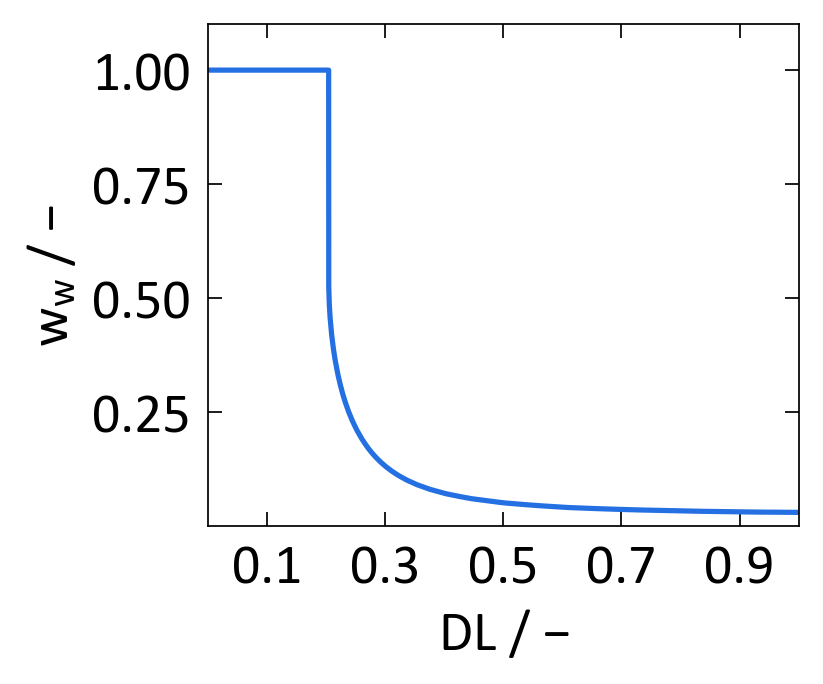

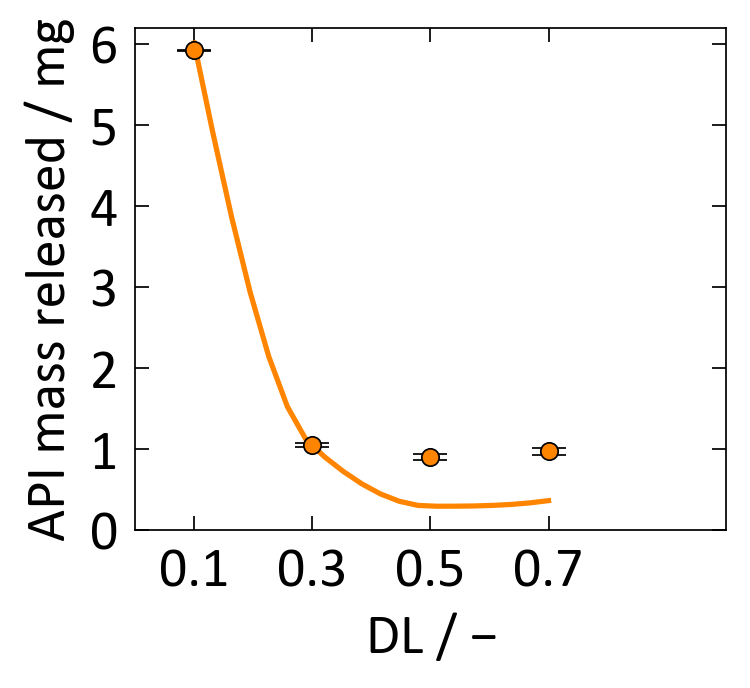

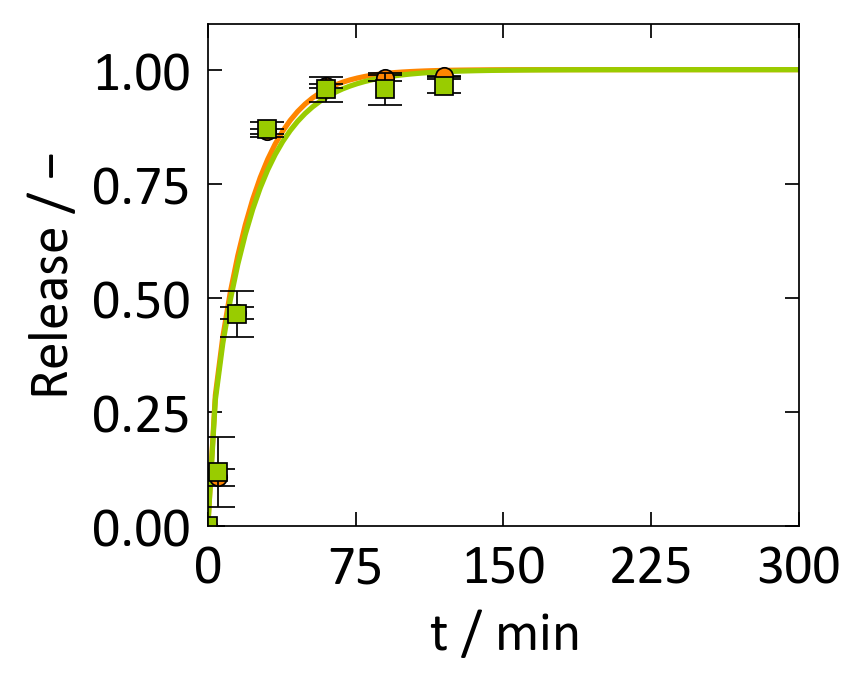

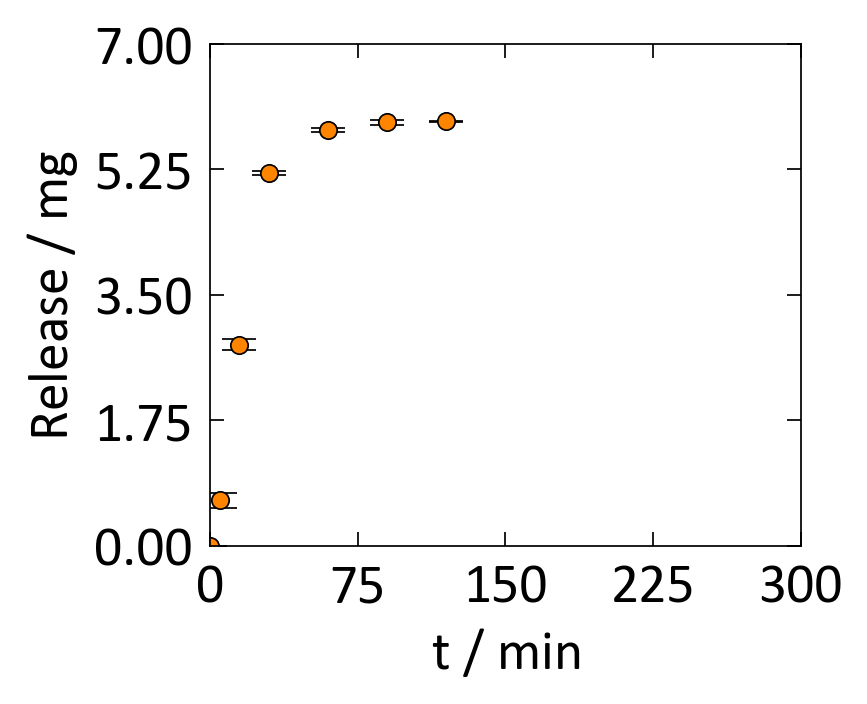

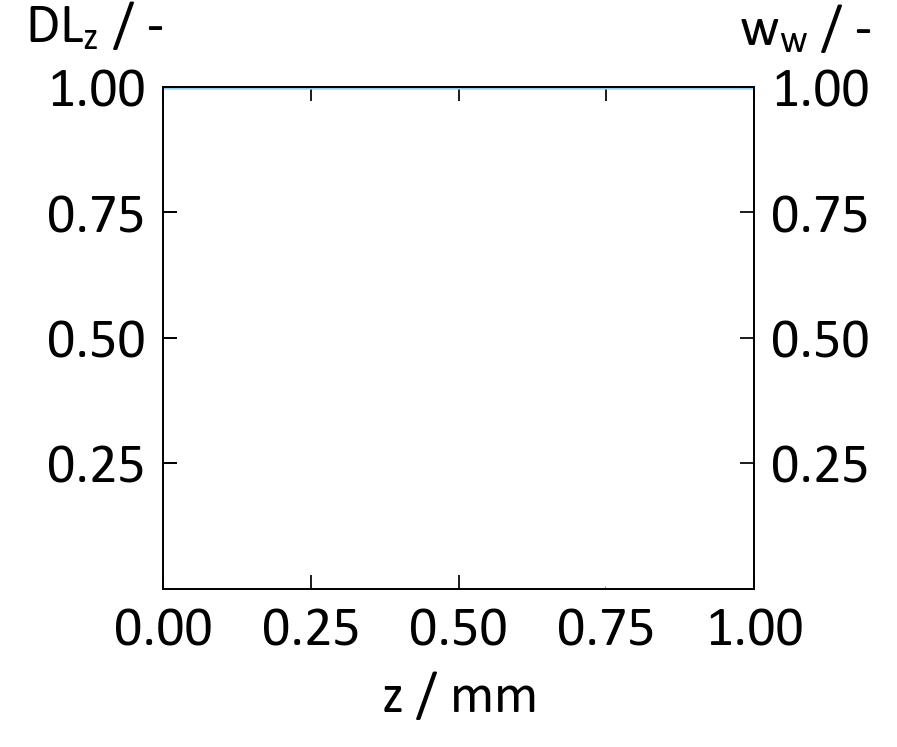

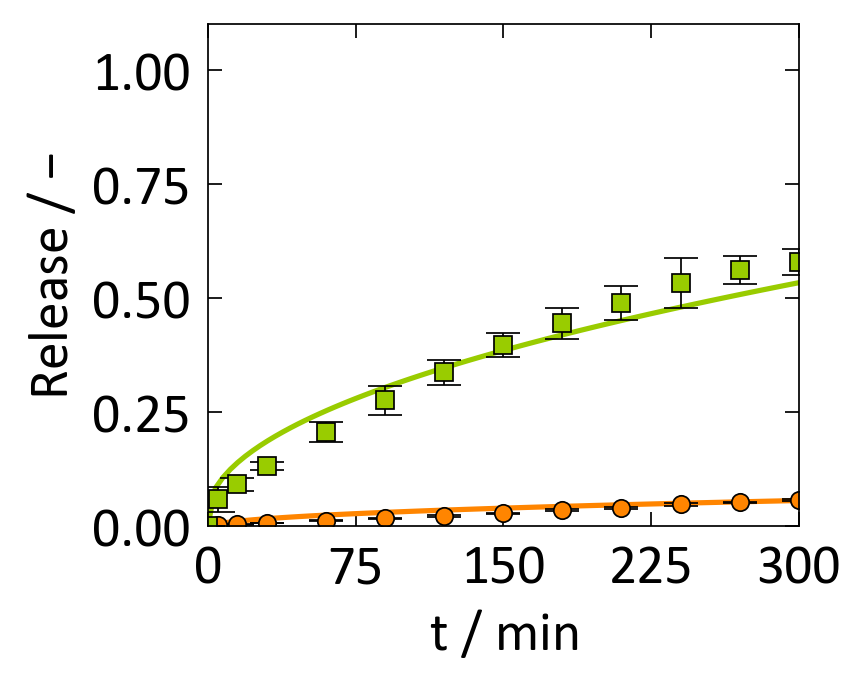

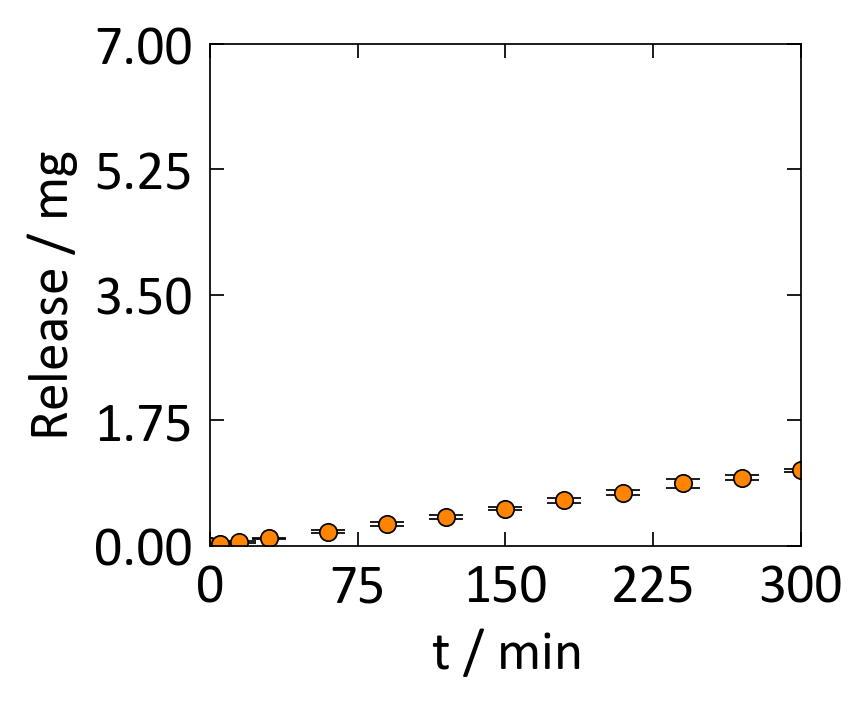

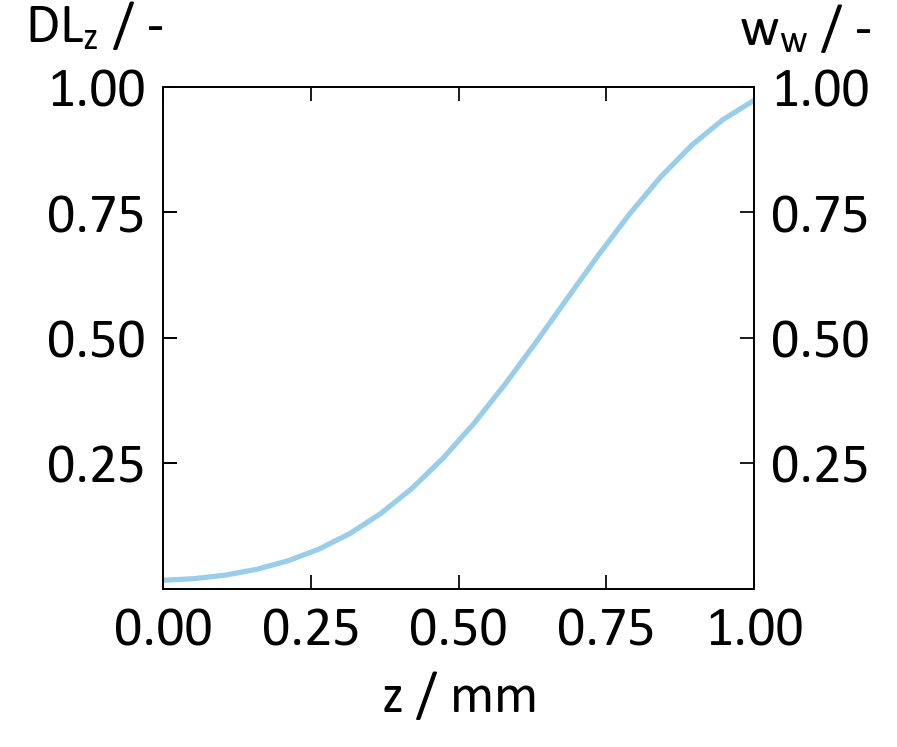

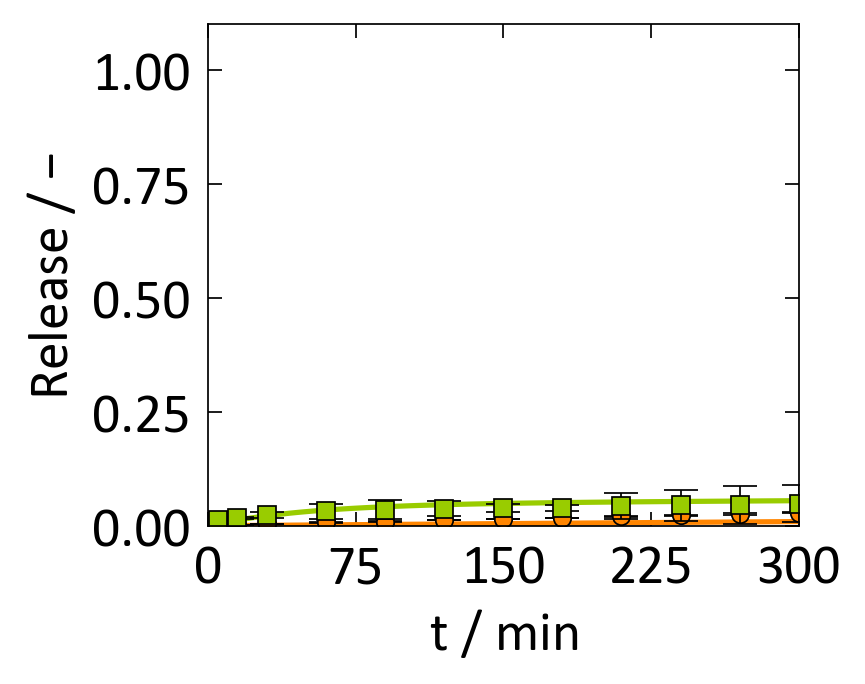

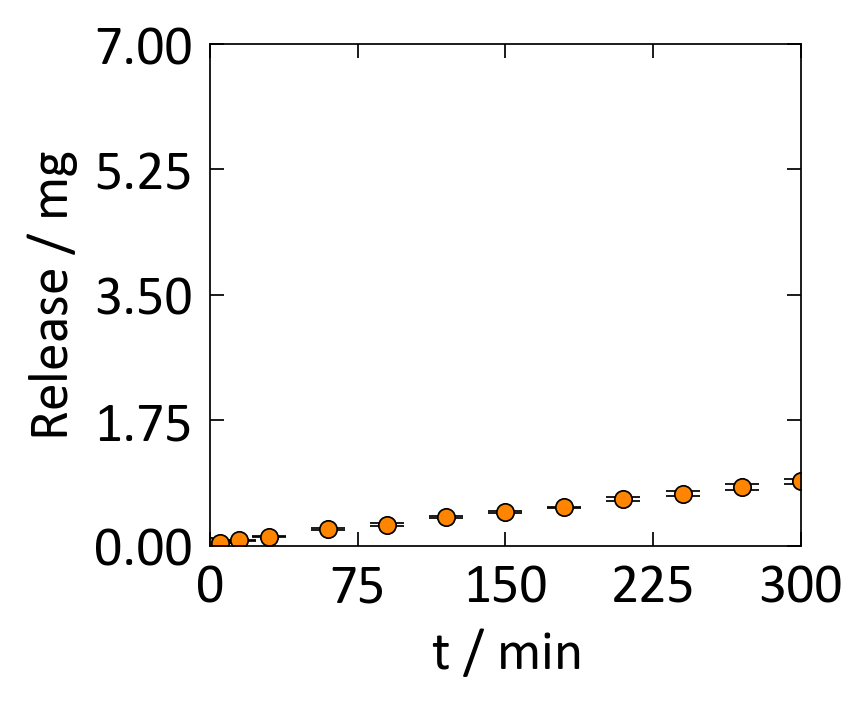

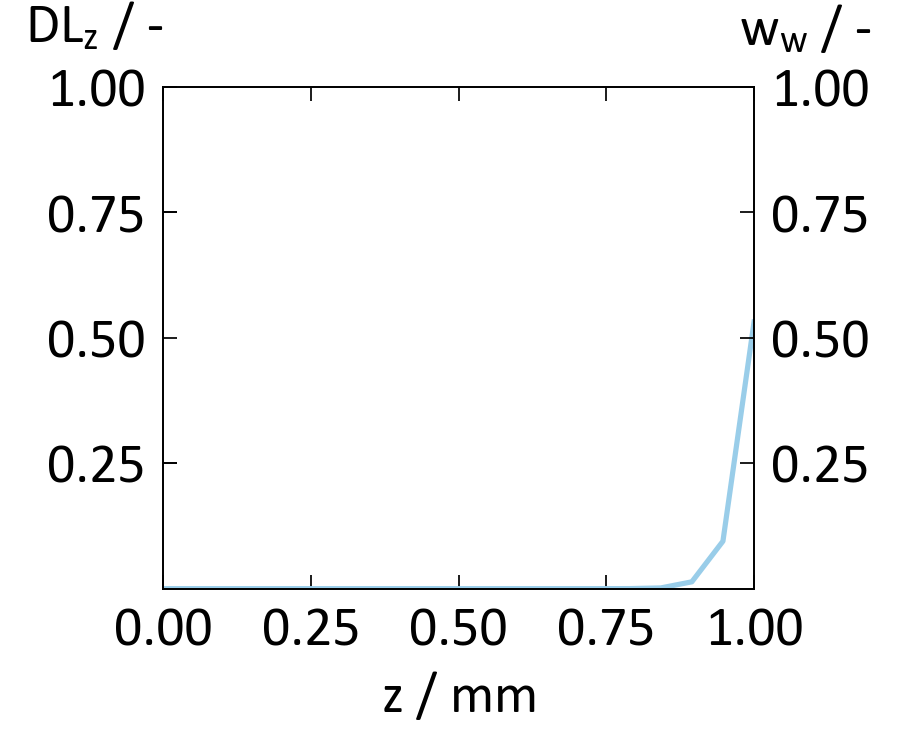

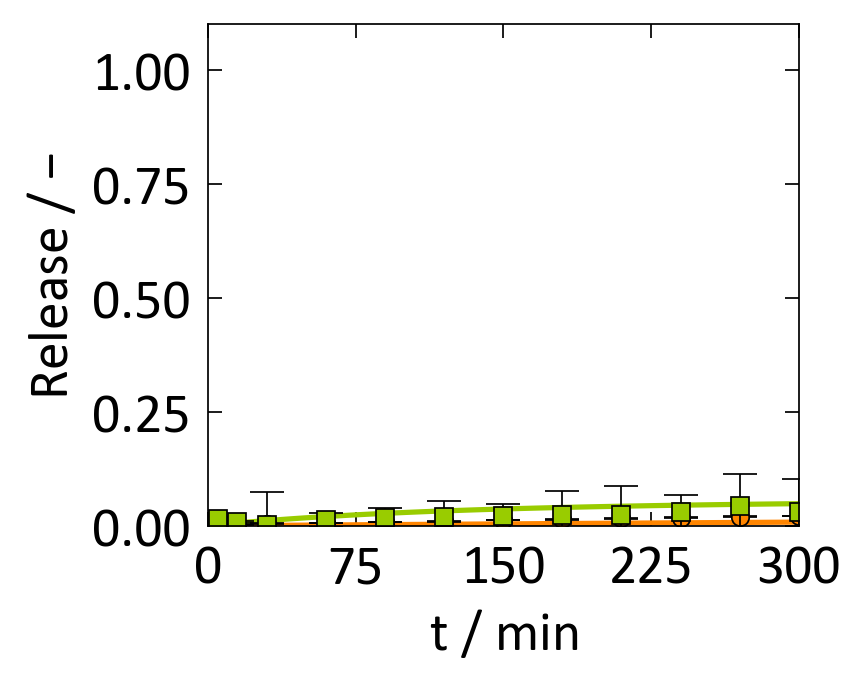

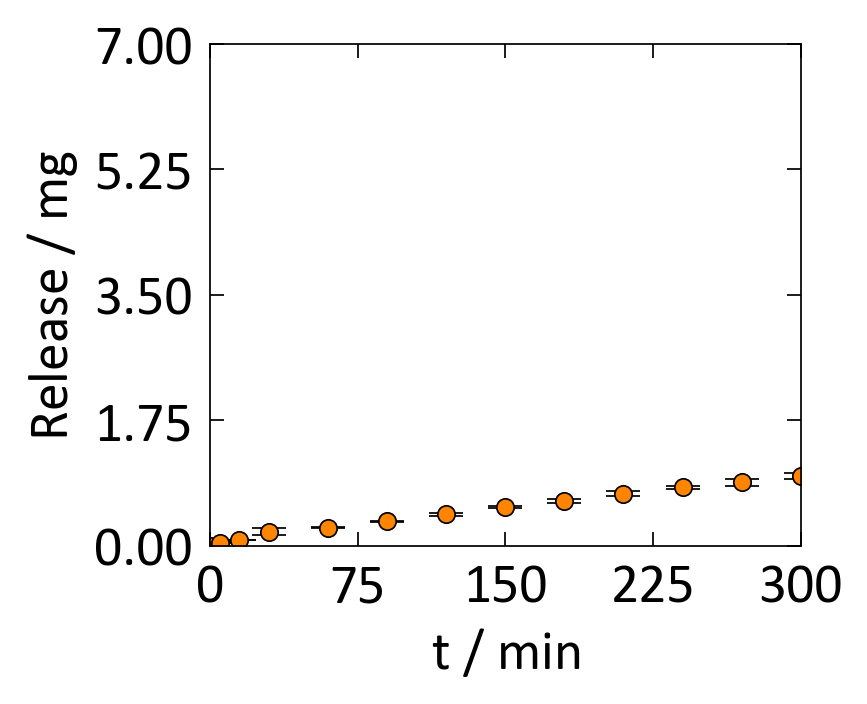

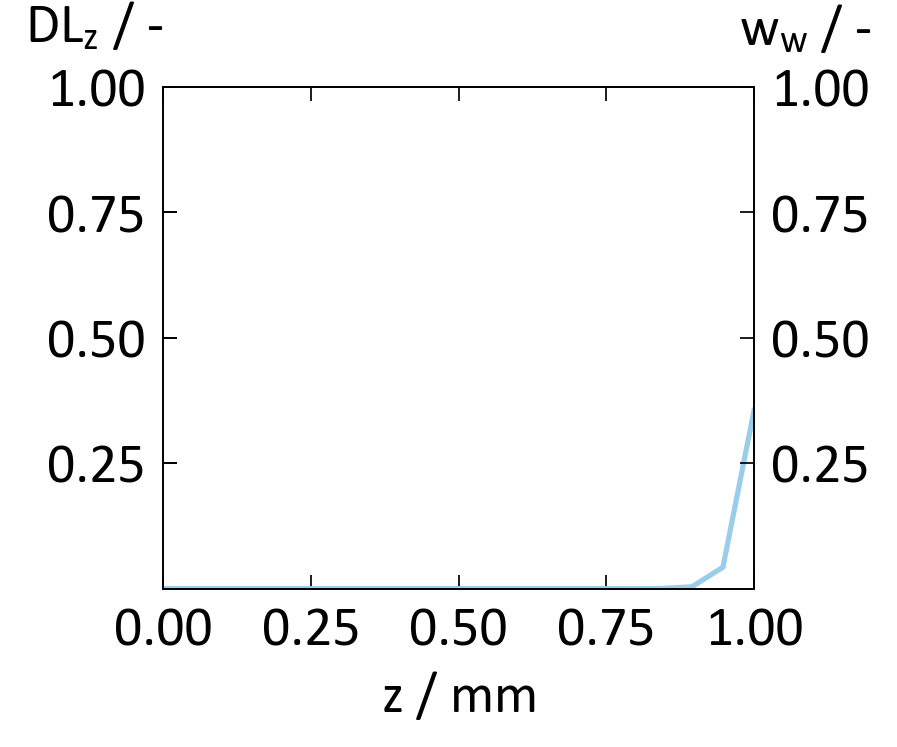

[]


In [4]:
#Choose_ASD(1,0.7)

fig15,ax15=origin_like.subplots()
origin_like.plot(ax15,dlggw,waterggw,'b-')
origin_like.set_xlabel(ax15,"DL","-")
origin_like.set_ylabel(ax15,"w_w","-")

ax15.set_xticks([0.1,0.3,0.5,0.7,0.9])
ax15.set_xlim([0,1.])
ax15.set_yticks([0.25,0.5,0.75,1])
ax15.set_ylim([0,1.1])

fig11,ax11=origin_like.subplots()


DLvec=np.asarray([0.1,0.3,0.5,0.7])
relL1,relPolL1,relL1exp,relPolL1exp,relL1std,relPolL1std=zip(*[Plot_Fit(1,0.1),Plot_Fit(1,0.3),Plot_Fit (1,0.5),Plot_Fit(1,0.7)])
# Plot_Fit(1,0.195)

# relL25,relPolL25,relL25exp,relPolL25exp,relL25std,relPolL25std=zip(*[Plot_Fit(0.25,0.1),Plot_Fit(0.25,0.3),Plot_Fit (0.25,0.5),Plot_Fit(0.25,0.7)])
# relL25,relPolL25,relL25exp,relPolL25exp,relL25std,relPolL25std=zip(*[Plot_Fit(0.25,0.3),Plot_Fit (0.25,0.5),Plot_Fit(0.25,0.7)])

from scipy.interpolate import pchip_interpolate
DLint=np.linspace(0.1,0.7,20)
origin_like.plot(ax11,DLint,pchip_interpolate(DLvec,relL1,DLint),'r-')
# origin_like.plot(ax11,DLint,pchip_interpolate(DLvec,relPolL1,DLint),'g-')
# origin_like.plot(ax11,DLint,pchip_interpolate(DLvec,relL25,DLint),'r-')
# origin_like.plot(ax11,DLvec,relL1,'r-')
# # origin_like.plot(ax11,DLvec,relL25,'r-')
origin_like.plot(ax11,DLvec,relL1exp,'ro',yerr=relL1std)
# origin_like.plot(ax11,DLvec,relPolL1exp,'gs',yerr=relPolL1std)
# origin_like.plot(ax11,DLvec,relL25exp,'r^',yerr=relL25std)
origin_like.set_xlabel(ax11,"DL","-")
ax11.set_ylabel("API mass released / mg")

ax11.set_xticks([0.1,0.3,0.5,0.7])
ax11.set_xlim([0,1.])
ax11.set_yticks([0,1,2,3,4,5,6])
# ax11.set_yticks([0,0.25,0.5,0.75,1.])
ax11.set_ylim([0,6.2])
plt.show()
print(Ds)

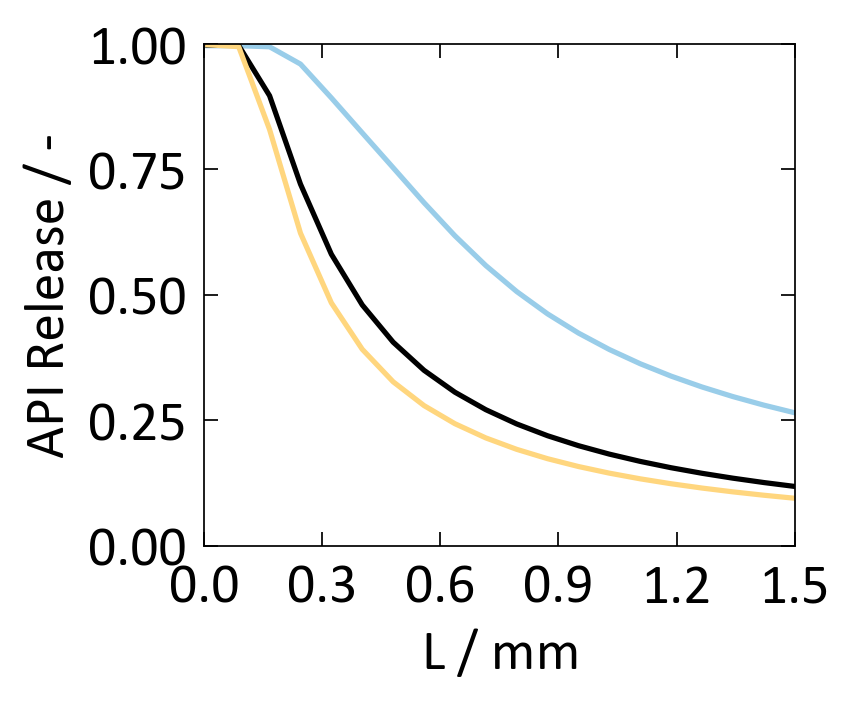

In [5]:
Lvec=np.linspace(0.01,1.5,20)
# relD03=[Plot_Fit(val,0.3,False)[0] for val in Lvec]
# relD05=[Plot_Fit(val,0.5,False)[0] for val in Lvec]
# relD07=[Plot_Fit(val,0.7,False)[0] for val in Lvec]

relD03=[0.9966655320035981, 0.9966655437793819, 0.9945380851303757, 0.9600749081727623, 0.8927080446246829, 0.822965448353917, 0.7535571602256808, 0.6838579119098498, 0.6178737197886127, 0.5585229299781714, 0.5067180908856586, 0.46214051366327813, 0.4239362547960469, 0.39112116644859396, 0.36276868954321384, 0.3380942599273624, 0.31645265214180507, 0.29732807563909525, 0.28031140098082274, 0.26507545617067096]
relD05=[0.9979996259750047, 0.9970723217480351, 0.897000618212209, 0.7208109728913704, 0.5810430555294501, 0.47998752971167613, 0.40581631750694114, 0.3497047152558288, 0.3060413076874249, 0.271195584090383, 0.2428055415286896, 0.21926894918857898, 0.19948222099968016, 0.18262106671864597, 0.16813253135697737, 0.15549922854691267, 0.14443440501371352, 0.13468399584348456, 0.12599981001431915, 0.11823803211902995]
relD07=[0.9985712302078561, 0.9947340375233479, 0.8295358952733722, 0.6231013409428341, 0.48410955475427675, 0.3915936570360422, 0.3268533313802998, 0.27939082886435895, 0.24326795069688478, 0.21493586801384057, 0.19217084603358203, 0.17349607720008797, 0.15790320647988432, 0.1447047866973391, 0.13337943129707597, 0.12357330202830774, 0.11498999410413002, 0.10742213341015383, 0.10069694152785735, 0.09467500018247343]


fig10,ax10=origin_like.subplots()

origin_like.set_xlabel(ax10,"L","mm")
ax10.set_ylabel("API Release / -")
origin_like.set_ticks(ax10,0,1.5,0,1)
ax10.set_xticks([0,0.3,0.6,0.9,1.2,1.5])

origin_like.plot(ax10,Lvec,relD03,"c-")
origin_like.plot(ax10,Lvec,relD05,"k-")
origin_like.plot(ax10,Lvec,relD07,"y-")

# origin_like.plot(ax10,np.array([0.25]),np.array([relL25exp[0]]),'c^',yerr=np.array([relL25std[0]]))
# origin_like.plot(ax10,np.array([0.25]),np.array([relL25exp[1]]),'ko',yerr=np.array([relL25std[1]]))
# origin_like.plot(ax10,np.array([0.25]),np.array([relL25exp[2]]),'ys',yerr=np.array([relL25std[2]]))

# origin_like.plot(ax10,np.array([1]),np.array([relL1exp[0]]),'c^',yerr=np.array([relL1std[0]]))
# origin_like.plot(ax10,np.array([1]),np.array([relL1exp[1]]),'ko',yerr=np.array([relL1std[1]]))
# origin_like.plot(ax10,np.array([1]),np.array([relL1exp[2]]),'ys',yerr=np.array([relL1std[2]]))

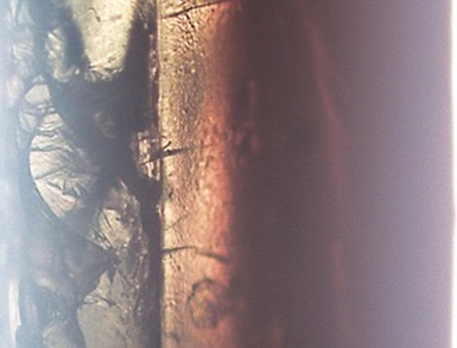
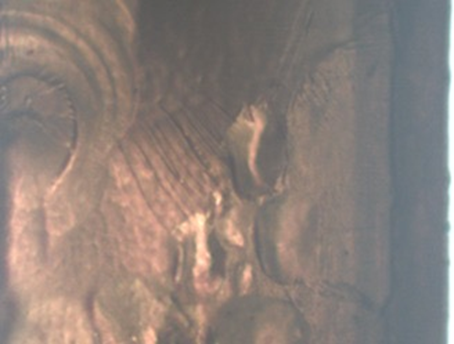
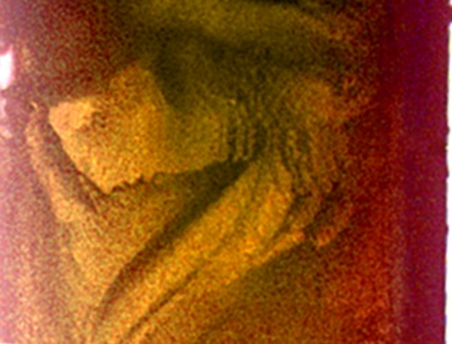


In [6]:
# from IPython.display import Image
# from IPython.display import display
# import urllib.request
# from io import BytesIO
# # url='![image.png](attachment:image.png)'
# Image("![image.png](attachment:image.png)")
# # with urllib.request.urlopen(url) as url:
    # img = Image.open(BytesIO(url.read()))

# display(img)

L:1_DL:0.7
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.01958 seconds ----------------
------------- Initialization and postprocessing took 0.0047549 seconds----------------


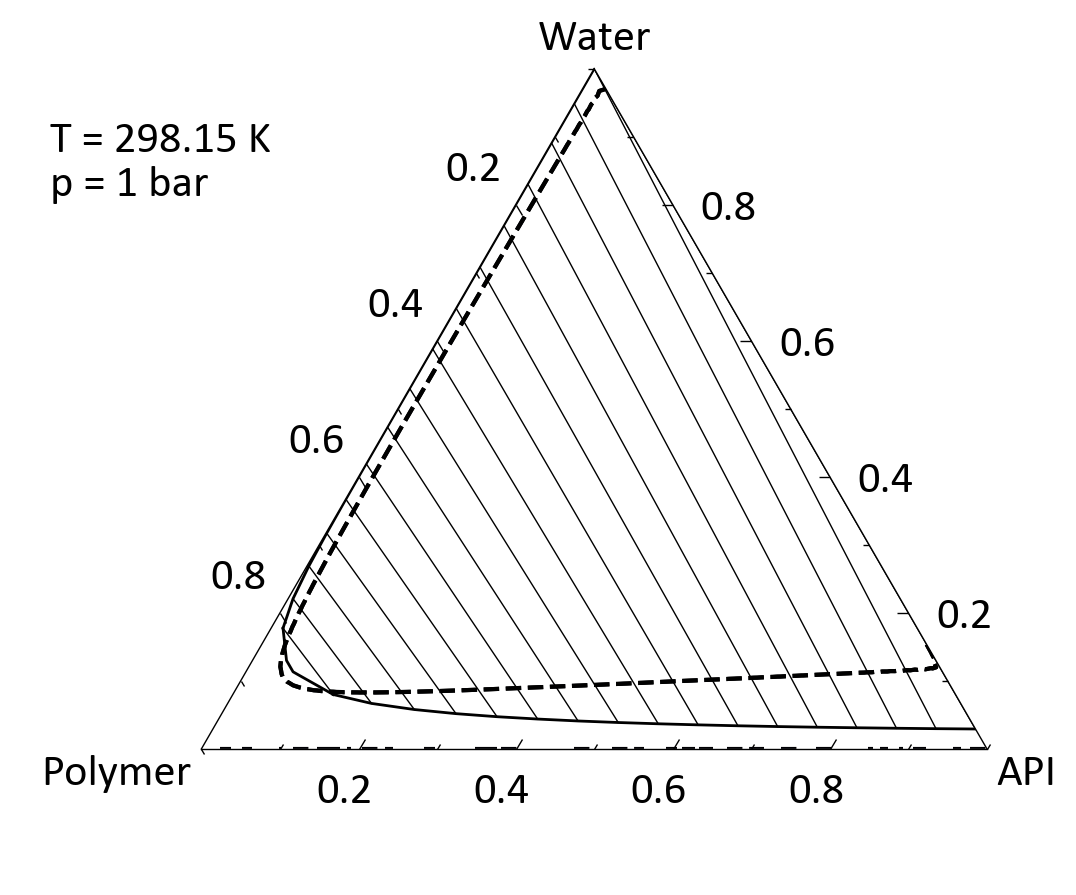

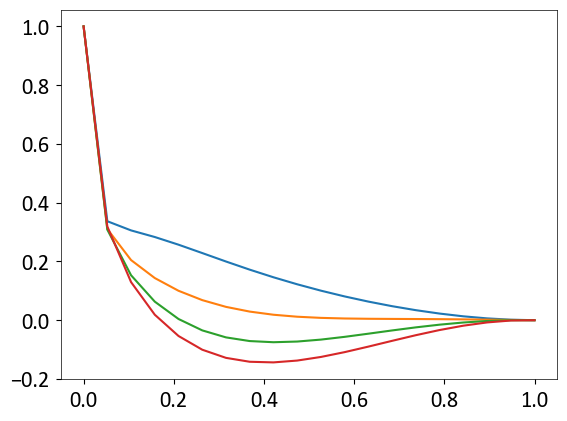

In [7]:
# Spin=np.array([[0.016, 0.06799999999999999, 0.916], [0.016, 0.072, 0.912], [0.016, 0.076, 0.908], [0.016, 0.08, 0.904], [0.016, 0.084, 0.9], [0.016, 0.088, 0.896], [0.016, 0.092, 0.892], [0.016, 0.624, 0.36], [0.02, 0.732, 0.248], [0.024, 0.776, 0.19999999999999996], [0.032, 0.8119999999999999, 0.15600000000000003], [0.036000000000000004, 0.82, 0.14400000000000002], [0.04, 0.824, 0.136], [0.048, 0.828, 0.124], [0.052000000000000005, 0.828, 0.12], [0.056, 0.828, 0.11599999999999999], [0.084, 0.812, 0.10399999999999998], [0.108, 0.792, 0.09999999999999998], [0.264, 0.636, 0.09999999999999998], [0.268, 0.632, 0.09999999999999998], [0.34800000000000003, 0.548, 0.10399999999999998], [0.352, 0.544, 0.10399999999999998], [0.424, 0.468, 0.10799999999999998], [0.492, 0.396, 0.11199999999999999], [0.496, 0.392, 0.11199999999999999], [0.5640000000000001, 0.31999999999999995, 0.11599999999999999], [0.5680000000000001, 0.31599999999999995, 0.11599999999999999], [0.628, 0.252, 0.12], [0.632, 0.248, 0.12], [0.636, 0.244, 0.12], [0.6960000000000001, 0.17999999999999994, 0.124], [0.7000000000000001, 0.17599999999999993, 0.124], [0.704, 0.17200000000000004, 0.124], [0.756, 0.11599999999999999, 0.128], [0.76, 0.11199999999999999, 0.128], [0.764, 0.10799999999999998, 0.128], [0.768, 0.10399999999999998, 0.128], [0.772, 0.09999999999999998, 0.128], [0.776, 0.09599999999999997, 0.128], [0.78, 0.09199999999999997, 0.128], [0.812, 0.05599999999999994, 0.132], [0.8160000000000001, 0.051999999999999935, 0.132], [0.8200000000000001, 0.04799999999999993, 0.132], [0.8240000000000001, 0.04399999999999993, 0.132], [0.8280000000000001, 0.039999999999999925, 0.132], [0.8320000000000001, 0.03599999999999992, 0.132], [0.836, 0.03200000000000003, 0.132], [0.84, 0.028000000000000025, 0.132], [0.844, 0.020000000000000018, 0.136], [0.844, 0.02400000000000002, 0.132], [0.848, 0.016000000000000014, 0.136], [0.848, 0.020000000000000018, 0.132], [0.852, 0.01200000000000001, 0.136], [0.852, 0.016000000000000014, 0.132], [0.856, 0.01200000000000001, 0.132], [0.86, 0.01200000000000001, 0.128]])
Binr=np.array([[0.32074, 0.05069, 0.62857], [0.38227, 0.0463, 0.57143], [0.44275, 0.04296, 0.51429], [0.50253, 0.04033, 0.45714], [0.5618, 0.0382, 0.4], [0.62068, 0.03646, 0.34286], [0.67927, 0.03502, 0.28571], [0.73761, 0.03382, 0.22857], [0.79576, 0.03281, 0.17143], [0.85374, 0.03197, 0.11429], [0.91159, 0.03127, 0.05714], [0.96159, 0.03127, 0]])
Binl=np.asarray([[0.000965, 0.31331, 0.68572], [0.000341, 0.36452, 0.63513], [0.000118, 0.4178, 0.58209], [4.07e-05, 0.47317, 0.52679], [1.42e-05, 0.53043, 0.46955], [5.08e-06, 0.58921, 0.41079], [1.9e-06, 0.64902, 0.35098], [7.5e-07, 0.70936, 0.29063], [3.15e-07, 0.76973, 0.23027], [1.42e-07, 0.82965, 0.17035], [6.79e-08, 0.88881, 0.11119], [1.99e-07, 0.99996, 3.61e-05]])
SLE=np.asarray([[0.31535, 3.5599999999999995e-24, 0.68465],[0.29868, 0.03341, 0.66791], [0.26245, 0.06228, 0.67527], [0.22604, 0.08571, 0.68825], [0.19335, 0.1046, 0.70205], [0.16505, 0.12004, 0.7149], [0.14082, 0.13294, 0.72624], [0.12004, 0.14398, 0.73597], [0.10213, 0.15367, 0.7442], [0.08657, 0.16238, 0.75104], [0.07295, 0.17042, 0.75664], [0.06091, 0.17803, 0.76106], [0.05018, 0.18545, 0.76437], [0.04055, 0.19293, 0.76652], [0.03183, 0.20077, 0.7674], [0.02386, 0.20947, 0.76667], [0.01653, 0.2199, 0.76357], [0.0097, 0.23434, 0.75596], [0.00331, 0.26295, 0.73374],[0, 1, 0],[1, 0, 0],[0.31535, 3.5599999999999995e-24, 0.68465]])
TG=np.asarray([[0.96265, 0.03735, 0.0],[0.61807, 0.0729, 0.30903], [0.29803, 0.10591, 0.59606], [0.0, 0.13666, 0.86334], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0] ])
DL03sorp=np.asarray([[0.69788, 0.00304, 0.29909], [0.69706, 0.00421, 0.29874], [0.69646, 0.00505, 0.29848], [0.696, 0.00572, 0.29828], [0.69559, 0.0063, 0.29811], [0.69523, 0.00681, 0.29796], [0.69489, 0.0073, 0.29781], [0.69458, 0.00774, 0.29768], [0.69429, 0.00815, 0.29755], [0.69402, 0.00854, 0.29744], [0.69376, 0.00891, 0.29733], [0.69351, 0.00927, 0.29722], [0.69327, 0.00961, 0.29712], [0.69305, 0.00993, 0.29702], [0.69283, 0.01024, 0.29693], [0.69263, 0.01054, 0.29684], [0.69242, 0.01083, 0.29675], [0.69222, 0.01111, 0.29667], [0.69203, 0.01139, 0.29658], [0.69184, 0.01166, 0.2965], [0.69166, 0.01192, 0.29642], [0.69147, 0.01219, 0.29634], [0.6913, 0.01242, 0.29627], [0.69112, 0.01268, 0.2962], [0.69096, 0.01292, 0.29612], [0.69079, 0.01315, 0.29605], [0.69063, 0.01339, 0.29598], [0.69048, 0.01361, 0.29592], [0.69032, 0.01382, 0.29585], [0.69017, 0.01405, 0.29579], [0.69002, 0.01426, 0.29572], [0.68987, 0.01447, 0.29566], [0.68974, 0.01465, 0.2956], [0.6896, 0.01486, 0.29554], [0.68947, 0.01504, 0.29549], [0.68935, 0.01522, 0.29543], [0.68921, 0.01541, 0.29538], [0.68909, 0.01558, 0.29533], [0.68898, 0.01574, 0.29528], [0.68887, 0.0159, 0.29523], [0.68875, 0.01607, 0.29518], [0.68864, 0.01623, 0.29513], [0.68852, 0.01639, 0.29508], [0.68843, 0.01653, 0.29504], [0.68833, 0.01668, 0.295], [0.68821, 0.01684, 0.29495], [0.68809, 0.01702, 0.2949], [0.68798, 0.01717, 0.29485], [0.68788, 0.01731, 0.29481], [0.68778, 0.01745, 0.29476], [0.68768, 0.0176, 0.29472], [0.68758, 0.01774, 0.29468], [0.68748, 0.01789, 0.29463], [0.68738, 0.01804, 0.29459], [0.68728, 0.01817, 0.29455], [0.68718, 0.01832, 0.2945], [0.68708, 0.01845, 0.29446], [0.68698, 0.0186, 0.29442], [0.68688, 0.01874, 0.29438], [0.68679, 0.01887, 0.29434], [0.68669, 0.01901, 0.2943], [0.6866, 0.01915, 0.29426], [0.6865, 0.01929, 0.29421], [0.68641, 0.01942, 0.29418], [0.68632, 0.01955, 0.29414], [0.68622, 0.01968, 0.2941], [0.68613, 0.01981, 0.29406], [0.68604, 0.01994, 0.29402], [0.68595, 0.02007, 0.29398], [0.68586, 0.02019, 0.29394], [0.68578, 0.02032, 0.2939]])
DL05sorp=np.asarray([[0.49745, 0.0051, 0.49745], [0.4963, 0.0074, 0.4963], [0.4955, 0.009, 0.4955], [0.49485, 0.01029, 0.49485], [0.4943, 0.0114, 0.4943], [0.49381, 0.01238, 0.49381], [0.49336, 0.01327, 0.49336], [0.49296, 0.01408, 0.49296], [0.49258, 0.01484, 0.49258], [0.49223, 0.01554, 0.49223], [0.4919, 0.0162, 0.4919], [0.49159, 0.01682, 0.49159], [0.49129, 0.01742, 0.49129], [0.49101, 0.01798, 0.49101], [0.49074, 0.01852, 0.49074], [0.49048, 0.01904, 0.49048], [0.49023, 0.01954, 0.49023], [0.48999, 0.02002, 0.48999], [0.48976, 0.02049, 0.48976], [0.48953, 0.02094, 0.48953], [0.48931, 0.02137, 0.48931], [0.4891, 0.0218, 0.4891], [0.4889, 0.02221, 0.4889], [0.4887, 0.0226, 0.4887], [0.4885, 0.02299, 0.4885], [0.48831, 0.02337, 0.48831], [0.48813, 0.02374, 0.48813], [0.48795, 0.0241, 0.48795], [0.48778, 0.02445, 0.48778], [0.4876, 0.02479, 0.4876], [0.48743, 0.02513, 0.48743], [0.48727, 0.02546, 0.48727], [0.48711, 0.02578, 0.48711], [0.48695, 0.0261, 0.48695], [0.4868, 0.02641, 0.4868], [0.48665, 0.02671, 0.48665], [0.4865, 0.02701, 0.4865], [0.48635, 0.0273, 0.48635], [0.48621, 0.02759, 0.48621], [0.48607, 0.02787, 0.48607], [0.48593, 0.02814, 0.48593], [0.48579, 0.02842, 0.48579], [0.48566, 0.02869, 0.48566], [0.48552, 0.02895, 0.48552], [0.4854, 0.02921, 0.4854], [0.48527, 0.02946, 0.48527], [0.48514, 0.02971, 0.48514], [0.48502, 0.02996, 0.48502], [0.4849, 0.0302, 0.4849], [0.48478, 0.03045, 0.48478], [0.48466, 0.03068, 0.48466], [0.48454, 0.03091, 0.48454], [0.48443, 0.03114, 0.48443], [0.48432, 0.03136, 0.48432], [0.48421, 0.03157, 0.48421], [0.48411, 0.03178, 0.48411], [0.48401, 0.03199, 0.48401], [0.48391, 0.03219, 0.48391]])
DL07sorp=np.asarray([[0.29749, 0.00835, 0.69415], [0.29567, 0.01443, 0.6899], [0.29416, 0.01947, 0.68637], [0.29283, 0.0239, 0.68327], [0.29163, 0.0279, 0.68047], [0.29053, 0.03158, 0.6779], [0.2895, 0.035, 0.6755], [0.28854, 0.03821, 0.67325], [0.28762, 0.04125, 0.67112], [0.28676, 0.04413, 0.66911], [0.28593, 0.04689, 0.66718], [0.28514, 0.04952, 0.66534], [0.28439, 0.05204, 0.66357], [0.28366, 0.05447, 0.66187], [0.28296, 0.05681, 0.66023], [0.28228, 0.05906, 0.65865], [0.28163, 0.06124, 0.65713], [0.28099, 0.06336, 0.65565], [0.28038, 0.06541, 0.65421], [0.27978, 0.0674, 0.65282], [0.2792, 0.06934, 0.65146], [0.27863, 0.07123, 0.65014], [0.27808, 0.07306, 0.64886], [0.27754, 0.07485, 0.6476], [0.27702, 0.07659, 0.64638], [0.27651, 0.07829, 0.6452], [0.27601, 0.07996, 0.64403], [0.27553, 0.08158, 0.6429], [0.27505, 0.08317, 0.64178], [0.27458, 0.08472, 0.6407], [0.27413, 0.08624, 0.63963], [0.27368, 0.08774, 0.63858], [0.27324, 0.08921, 0.63755], [0.27281, 0.09064, 0.63655], [0.27238, 0.09205, 0.63556], [0.27197, 0.09344, 0.63459], [0.27156, 0.09479, 0.63365], [0.27116, 0.09612, 0.63271], [0.27077, 0.09743, 0.6318], [0.27039, 0.09871, 0.6309], [0.27001, 0.09997, 0.63002], [0.26964, 0.10122, 0.62915], [0.26927, 0.10244, 0.6283], [0.26891, 0.10364, 0.62745], [0.26856, 0.10481, 0.62663], [0.26821, 0.10597, 0.62582], [0.26787, 0.10712, 0.62502], [0.26753, 0.10824, 0.62423], [0.2672, 0.10935, 0.62346], [0.26687, 0.11044, 0.6227], [0.26655, 0.11151, 0.62195], [0.26623, 0.11256, 0.62121], [0.26592, 0.1136, 0.62048], [0.26561, 0.11463, 0.61976], [0.26531, 0.11565, 0.61905], [0.26501, 0.11665, 0.61835], [0.26471, 0.11763, 0.61766], [0.26442, 0.1186, 0.61698], [0.26413, 0.11956, 0.61631], [0.26385, 0.1205, 0.61565]])
isohumide95=np.asarray([[0.97, 0.03, 0.],[0.66467, 0.05047, 0.28486],[0.4527, 0.09459, 0.4527],[0.25562, 0.14793, 0.59645],[0.162, 0.19, 0.648],[0., 0.35, 0.65]])
Binr1,Binr2,Binr3=Binr[:,0],Binr[:,1],Binr[:,2]
Binl1,Binl2,Binl3=Binl[:,0],Binl[:,1],Binl[:,2]

SLE1,SLE2,SLE3=SLE[:,0],SLE[:,1],SLE[:,2]
TG1,TG2,TG3=TG[:,0],TG[:,1],TG[:,2]
DL03sorp1,DL03sorp2,DL03sorp3=DL03sorp[:,0],DL03sorp[:,1],DL03sorp[:,2]
DL05sorp1,DL05sorp2,DL05sorp3=DL05sorp[:,0],DL05sorp[:,1],DL05sorp[:,2]
DL07sorp1,DL07sorp2,DL07sorp3=DL07sorp[:,0],DL07sorp[:,1],DL07sorp[:,2]
wH2O_ASD03=np.asarray([0.0, 0.04444354838720636, 0.07079032258054091, 0.10485483870954994, 0.16859677419389293, 0.2291129032256349, 0.2844758064516232, 0.34028225806469864, 0.3871532258061375, 0.43114516129035574, 0.47674193548363053, 0.5056693548386878, 0.5301129032256772])
wPol_ASD03=np.asarray([0.7, 0.6583169354838709, 0.6345629838709677, 0.6056548387096774, 0.5525225806451612, 0.5036443548387096, 0.45992580645161285, 0.4170596774193548, 0.3840427419354839, 0.3525298387096774, 0.32231774193548385, 0.3025814516129032, 0.2899298387096774])
wAPI_ASD03=np.asarray([0.3, 0.2972397258064516, 0.29465021774193545, 0.2894925, 0.2788832258064516, 0.2672391129032258, 0.25559862903225805, 0.24265467741935481, 0.22880120967741935, 0.216325, 0.20094274193548387, 0.1917532258064516, 0.17995483870967743])
wH2O_ASD05=np.asarray([0.0, 0.010563492063438967, 0.017380952381055675, 0.02603174603214214, 0.04235714285753701, 0.050976190476013025, 0.06461111111124644, 0.07237301587303076, 0.07998412698388052, 0.09487301587286272, 0.10405555555563561, 0.11461111111136253, 0.1254047619046188])
wPol_ASD05=np.asarray([0.5, 0.4941679523809524, 0.491499126984127, 0.4886977777777778, 0.48520793650793653, 0.48413626984126984, 0.4837631746031746, 0.48374142857142854, 0.4843733333333333, 0.48302285714285714, 0.48261785714285715, 0.4828198412698413, 0.48214380952380953])
wAPI_ASD05=np.asarray([0.5, 0.49527250793650796, 0.4911185714285714, 0.48527103174603176, 0.4724353968253968, 0.4648911904761905, 0.45162944444444447, 0.44388492063492063, 0.4356454761904762, 0.4221036507936508, 0.4133246031746032, 0.4025722222222222, 0.39245079365079366])
wH2O_ASD07=np.asarray([0.0, 0.009343750000286033, 0.011148437500420327, 0.022257812500210694, 0.03143749999993256, 0.0430390624996807, 0.05421875000008458, 0.06652343749989631, 0.0761093750002717, 0.0875781250003066, 0.09885937499957281, 0.11086718749997448, 0.11647656250005772])
wPol_ASD07=np.asarray([0.30000000000000004, 0.29575728906250004, 0.29818408593750007, 0.301027734375, 0.29813028125, 0.29750351562500005, 0.29756896093750007, 0.2974684140625, 0.297787703125, 0.29854518750000003, 0.29745059375000005, 0.29402604687500006, 0.2981578046875])
wAPI_ASD07=np.asarray([0.7, 0.694902015625, 0.6906652343749999, 0.67671671875, 0.67042859375, 0.65945796875, 0.6482130468749999, 0.6360085156249999, 0.6261064062499999, 0.6138804687499999, 0.6036921875, 0.5951046875, 0.5853640625])
nz=50

figt,axt=origin_like.ternary()
texp,wt, Dvecopt, wIND,wPol,wINDstd,wPolstd, DL_z,wwz,wtz,wi_0,mobile,Mi,a,b=Choose_ASD(1,0.7)
mobile=np.asarray([False,False,True])
# origin_like.plot(axt,wtz[:,2,-2],wtz[:,1,-2],"b-",z=wtz[:,0,-2],order=2)
# origin_like.plot(axt,wtz[:,2,-5],wtz[:,1,-5],"b-",z=wtz[:,0,-5],order=2)
# origin_like.plot(axt,wtz[:,2,-8],wtz[:,1,-8],"b-",z=wtz[:,0,-8],order=2)
# origin_like.plot(axt,wtz[:,2,-11],wtz[:,1,-11],"b-",z=wtz[:,0,-11],order=2)
# origin_like.plot(axt,wtz[:,2,-14],wtz[:,1,-14],"b-",z=wtz[:,0,-14],order=2)
# origin_like.plot(axt,wtz[:,2,25],wtz[:,1,25],"r-",z=wtz[:,0,25],order=2)
# origin_like.plot(axt,wt[:,2],wt[:,1],"b-",z=wt[:,0],order=2)
# origin_like.plot(axt,wH2O_ASD03,wPol_ASD03,"bo",z=wAPI_ASD03,order=2)
# origin_like.plot(axt,wH2O_ASD05,wPol_ASD05,"bo",z=wAPI_ASD05,order=2)
# origin_like.plot(axt,wH2O_ASD07,wPol_ASD07,"bo",z=wAPI_ASD07,order=2)
# wtzl=np.average(wtz[:,:,:][:,:,:-1],axis=2) # DL03
# wtzl=np.average(wtz[:,:,:][:,:,:-1],axis=2) # DL05
# origin_like.plot(axt,wtzl[:,2],wtzl[:,1],"bo",z=wtzl[:,0],order=2)
# [origin_like.plot(axt,wtz[:,2,i],wtz[:,1,i],"bo",z=wtz[:,0,i],order=2) for i in range(nz-1)]
# origin_like.plot(axt,wtz[-50,2,:],wtz[-50,1,:],"bo",z=wtz[-50,0,:],order=2) 
# origin_like.plot(axt,wtz[:,2,-2],wtz[:,1,-2],"bo",z=wtz[:,0,-2],order=2)
# origin_like.plot(axt,wtz[:,2,-4],wtz[:,1,-4],"bo",z=wtz[:,0,-4],order=2)
# origin_like.plot(axt,wtz[:,2,-5],wtz[:,1,-5],"bo",z=wtz[:,0,-5],order=2)
# origin_like.plot(axt,wtz[:,2,-6],wtz[:,1,-6],"bo",z=wtz[:,0,-6],order=2)
# origin_like.plot(axt,wtz[-1,2,-36],wtz[-1,1,-36],"bo",z=wtz[-1,0,-36],order=2)
# origin_like.plot(axt,isohumide95[:,1],isohumide95[:,2],"c-",z=isohumide95[:,0],order=2)
# origin_like.plot(axt,DL03sorp2,DL03sorp3,"co",z=DL03sorp1,order=2)
# origin_like.plot(axt,DL05sorp2,DL05sorp3,"co",z=DL05sorp1,order=2)
# origin_like.plot(axt,DL07sorp2,DL07sorp3,"co",z=DL07sorp1,order=2)
# origin_like.filled_line(axt,SLE2,SLE3,SLE1,"r-","d")
# origin_like.filled_line(axt,TG2,TG3,TG1,"g-.","d")
from diffusionpy import DasDennisSpacing
wspace=np.fmax(DasDennisSpacing.DasDennis(100,3),1E-300)
THFaktorw=np.asarray([massbalancecorrection(Gammaij_fun(np.ascontiguousarray(val)),val,mobile)[0][0] for val in wspace.T])
eigenvalues, eigenvectors=zip(*[np.linalg.eig(Gammaij_fun(np.ascontiguousarray(val))) for val in wspace.T])
eigenvalues, eigenvectors=np.asarray(eigenvalues), np.asarray(eigenvectors)
largesteigenvalue=np.asarray([eigenvalues[i,np.argmax(np.abs(eigenvalues[i,:]))] for i in range(len(eigenvalues[:,0]))])
THFaktorw2=np.asarray([Gammaij_fun(np.ascontiguousarray(val))[-1,-1] for val in wspace.T])
# wspace=DasDennisSpacing.DasDennis(100,3)
Stability=np.asarray([np.linalg.det(dlnai_dlnwi_fun(wspace[:,i])[:-1,:-1]) for i in range(len(wspace[-1,:]))])
Gammas=np.asarray([dlnai_dlnwi_fun(wspace[:,i]) for i in range(len(wspace[-1,:]))])
# wspace2=wspace[:,Stability>-1]
# Stability2=Stability[Stability>-1]

# wspace3=wspace2[:,Stability2<1]
# Stability3=Stability2[Stability2<1]
# wspace3=wspace3[:,wspace3[0,:]>0.01]
# wspace3=wspace3[:,wspace3[1,:]>0.01]
# wspace3=wspace3[:,wspace3[2,:]>0.01]
Gsurf=np.asarray([np.sum((np.nan_to_num(lngi_fun(np.ascontiguousarray(wspace[:,i]))+np.log(wspace[:,i])))*(wspace[:,i]/Mi),axis=0) for i in range(len(wspace[-1,:]))])
wspace4=wspace[:,Gsurf!=0]
Gsurf=Gsurf[Gsurf!=0]

aw=np.exp([np.nan_to_num(lngi_fun(np.ascontiguousarray(wspace[:,i]))+np.log(wspace[:,i])) for i in range(len(wspace[-1,:]))])[:,-1]
aa=np.exp([np.nan_to_num(lngi_fun(np.ascontiguousarray(wspace[:,i]))+np.log(wspace[:,i])) for i in range(len(wspace[-1,:]))])[:,0]


cs=axt.tricontour(wspace[2,:],wspace[1,:], wspace[0,:],  Stability,levels=[0.],cmap="magma",posx=-20,linestyles='--')
# cs=axt.tricontour(wspace[2,:],wspace[1,:], wspace[0,:],  np.nan_to_num(largesteigenvalue),levels=[0.],cmap="magma",posx=-20,linestyles='--')
# cs=axt.tricontour(wspace[2,:],wspace[1,:], wspace[0,:],  np.nan_to_num(THFaktorw),levels=[0.],cmap="magma",posx=-20,linestyles='--')
# cs=axt.tricontour(wspace[2,:],wspace[1,:], wspace[0,:],  np.nan_to_num(THFaktorw2),levels=[0.],cmap="RdYlGn",posx=-20,linestyles='--')
# cs=axt.tricontour(wspace[2,:],wspace[1,:], wspace[0,:],  np.nan_to_num(THFaktorw2),levels=[0.],cmap="winter",posx=-20,linestyles='-.')
# cs=axt.tricontour(wspace[2,:],wspace[1,:], wspace[0,:],  np.nan_to_num(THFaktorw),levels=[0.],cmap="winter",posx=-20,linestyles='--')
# cs=axt.tricontourf(wspace[2,:],wspace[1,:], wspace[0,:],  np.nan_to_num(largesteigenvalue)>0,cmap='RdYlGn',posx=-20,levels=2)
# cs=axt.tricontour(wspace[2,:],wspace[1,:], wspace[0,:],  np.nan_to_num(largesteigenvalue),levels=[0.],cmap="magma",posx=-20,linestyles='--')
# cs=axt.tricontourf(wspace[2,:],wspace[1,:], wspace[0,:],  np.nan_to_num(THFaktorw2)>0,cmap='RdYlGn',posx=-20,levels=2,zorder=-1)
# cs=axt.tricontour(wspace[2,:],wspace[1,:], wspace[0,:],  np.nan_to_num(THFaktorw2),levels=[0.],cmap="magma",posx=-20,linestyles='--')

p = cs.collections[0].get_paths()[0]
v = p.vertices
x = v[:,0]
y = v[:,1]
a=y
b=0.5*(1-a)-x*np.sqrt(3)/2
c=1-a-b

# a=[0.1535347603242508, 0.15, 0.14968455235079275, 0.14000000000000004, 0.13414237980219296, 0.13510918255838833, 0.13310940070609292, 0.13342333779392573, 0.13239351241352942, 0.1323646987999544, 0.13176188109307346, 0.13150888350641232, 0.1311661518822711, 0.13074532131856337, 0.13058993169084215, 0.1300324424638471, 0.13002611403514233, 0.13, 0.12942076816252127, 0.12945162929168452, 0.12882096497981835, 0.12886373860367964, 0.12822785449997223, 0.1282672590615298, 0.1276405645411485, 0.1276652165398202, 0.1270585023596808, 0.12705974246542467, 0.12648124762567595, 0.12645238111855414, 0.1259084911050312, 0.12584427863968756, 0.12533999778341778, 0.1252363036835861, 0.12477558377015963, 0.12462912693811837, 0.12421510132244831, 0.12402327500851792, 0.12365842883973024, 0.12341916783476403, 0.123105464000791, 0.12281714524742524, 0.1225561189453018, 0.12221748618976908, 0.12201031681907287, 0.12162042288479026, 0.12146798924890234, 0.1210261514533179, 0.12092907446357398, 0.12043484000028314, 0.12039351587195399, 0.12, 0.11984691200184344, 0.11984428151186398, 0.11926371989882384, 0.11924824803030672, 0.11868489607010546, 0.11865260437520844, 0.11811041676719697, 0.11805783162019458, 0.11754023883060147, 0.11746432853888311, 0.11697433567918704, 0.1168724700734407, 0.11641268248262433, 0.11628259017287368, 0.11585525688110684, 0.11569499310047196, 0.11530203962150537, 0.11510995886038539, 0.11475301454680442, 0.1145277478800861, 0.11420816863181403, 0.11394860510436437, 0.11366749206218199, 0.11337276362778576, 0.11313097835626978, 0.11280044797033684, 0.1125986245301912, 0.11223187708394942, 0.11207043130782111, 0.11166726716586936, 0.11154640337933024, 0.11110683434547729, 0.11102654971253177, 0.1105507973052845, 0.11051088392335157, 0.10999999999999999, 0.10999936224005652, 0.10999933943921306, 0.10943772589639977, 0.10941666834699393, 0.10888219170927883, 0.1088385837349393, 0.1083328515293594, 0.10826543741588249, 0.10778981253914147, 0.10769759168273402, 0.10725319915923293, 0.10713542363697269, 0.1067231552786044, 0.1065793298452061, 0.10619984687220804, 0.10602973143230063, 0.10568346508431636, 0.10548707973628907, 0.1051742298752634, 0.10495186267365054, 0.10467239435361048, 0.10442461199222614, 0.10417824994658387, 0.10390591162744334, 0.10369213260300408, 0.1033964074276916, 0.10321443027578739, 0.10289681857852256, 0.10274559200123703, 0.10240795114027272, 0.10228613898591982, 0.10193071422408208, 0.1018366782372494, 0.10146613947844382, 0.10139791944463031, 0.101015404753137, 0.10097069605114517, 0.10057986307076212, 0.10055599167081876, 0.10016107665015356, 0.10015497266205299, 0.09999999999999998, 0.09974789149565139, 0.09973653751893008, 0.0993472650033509, 0.09931820350895552, 0.09897020776777364, 0.09892518428445661, 0.09861957662441882, 0.09856077685923052, 0.09829885315086391, 0.0982289306268784, 0.09801232023596174, 0.09793442010181624, 0.09776530229095978, 0.09768307506647915, 0.09756449772494097, 0.09748209191022636, 0.09741844792423555, 0.09734046147784899, 0.09733821147251659, 0.09726956630717506, 0.09733835540722208, 0.09728403153277997, 0.09743845936788482, 0.097402970045822, 0.09766547029227524, 0.097651851991305, 0.09805752413173303, 0.09806538460236827, 0.09867037231474325, 0.09869209812662, 0.099588935138807, 0.09960202473632818, 0.09999999999999998, 0.10080675315467809, 0.10104889786044054, 0.10245894885507889, 0.1034711522194457, 0.10483441958837711, 0.10770577750427679, 0.10834950094541462, 0.10999999999999999, 0.11345600410159312, 0.11999999999999998, 0.12158329628357026, 0.13, 0.13548966258105713, 0.14, 0.14306253775936745, 0.15000000000000002, 0.15834950881966303, 0.16000000000000003, 0.16394120591869973, 0.17000000000000004, 0.17139925124093394, 0.17999999999999994, 0.1833760068104146, 0.18999999999999995, 0.19500744047491925, 0.19999999999999996, 0.2063738769693491, 0.20999999999999996, 0.21753277358404174, 0.21999999999999997, 0.22852623222390964, 0.22999999999999998, 0.23938575420777508, 0.24, 0.24809158669506454, 0.25, 0.250109586949188, 0.26, 0.26064899213585957, 0.27, 0.27113475684338617, 0.28, 0.28157381509146256, 0.29000000000000004, 0.29197191552694196, 0.30000000000000004, 0.3023338619197448, 0.30999999999999994, 0.312663699516222, 0.31999999999999995, 0.32296485880070724, 0.32999999999999996, 0.33324026766915876, 0.33999999999999997, 0.34349244008230234, 0.35, 0.3537235466587739, 0.36, 0.3639354713450393, 0.37, 0.3741298572562717, 0.38, 0.3843081440222258, 0.39, 0.39447159841170965, 0.4, 0.4046213396095743, 0.41000000000000003, 0.4147583601966134, 0.42000000000000004, 0.42488354366279535, 0.43000000000000005, 0.4349976791045076, 0.43999999999999995, 0.4451014736167604, 0.44999999999999996, 0.45519556279394585, 0.45999999999999996, 0.4652805196657589, 0.47, 0.47535686233347274, 0.48000000000000004, 0.4854250605230444, 0.49, 0.4954855412287499, 0.5, 0.5055386935926682, 0.51, 0.5155848731361935, 0.52, 0.5256244054421476, 0.53, 0.5356575893708349, 0.54, 0.5456846998727858, 0.55, 0.5557059904607458, 0.56, 0.5657216953837261, 0.5700000000000001, 0.5757320315465042, 0.5800000000000001, 0.5857372002056792, 0.5900000000000001, 0.5957373884736639, 0.6, 0.6057327706543705, 0.61, 0.6157235094294782, 0.62, 0.6257097569157297, 0.63, 0.6356916556082548, 0.6400000000000001, 0.6456693392198317, 0.65, 0.6556429334309791, 0.6599999999999999, 0.6656125565587112, 0.6699999999999999, 0.6755783201499082, 0.6799999999999999, 0.6855403295101952, 0.69, 0.6954986841688608, 0.7, 0.7054534782866431, 0.71, 0.7154047984646427, 0.72, 0.7253527344989845, 0.73, 0.7352973635035052, 0.74, 0.7452387611536448, 0.75, 0.7551769976016807, 0.76, 0.7651121431811603, 0.77, 0.7750442596317034, 0.78, 0.7849734060361362, 0.79, 0.7948996370022501, 0.8, 0.8048230022706473, 0.81, 0.8147435460947012, 0.8200000000000001, 0.8246613063047384, 0.8300000000000001, 0.8345763129544381, 0.84, 0.8444885862815901, 0.85, 0.854398133705347, 0.86, 0.8643049452222847, 0.87, 0.8742089862630438, 0.88, 0.8841101862197036, 0.89, 0.8940084192850962, 0.9000000000000001, 0.9039034709677314, 0.91, 0.913794976025625, 0.9199999999999999, 0.923682294805814, 0.9299999999999999, 0.9335642425816049, 0.94, 0.9434384179245283, 0.95, 0.9532992100606903, 0.96, 0.9631299762001866, 0.97, 0.9728505509015589, 0.9793717169008731, 0.9758686025573824]
# b=[0.0, 0.00011300946236481035, 0.00031544764920721224, 0.0010521650050996922, 0.009999999999999953, 0.014890817441611637, 0.020000000000000018, 0.026576662206074297, 0.02999999999999997, 0.03763530120004549, 0.039999999999999925, 0.04849111649358756, 0.04999999999999993, 0.05925467868143652, 0.05999999999999989, 0.0699675575361528, 0.06999999999999995, 0.0704119787577081, 0.0799999999999999, 0.08054837070831539, 0.08999999999999997, 0.0911362613963203, 0.09999999999999998, 0.10173274093847018, 0.11000000000000004, 0.11233478346017978, 0.11999999999999994, 0.12294025753457527, 0.13, 0.13354761888144584, 0.14, 0.14415572136031246, 0.15000000000000002, 0.1547636963164139, 0.16000000000000003, 0.16537087306188164, 0.16999999999999993, 0.17597672499148198, 0.17999999999999994, 0.18658083216523585, 0.18999999999999992, 0.19718285475257472, 0.19999999999999998, 0.20778251381023083, 0.2099999999999999, 0.21837957711520967, 0.21999999999999997, 0.22897384854668207, 0.22999999999999995, 0.23956515999971684, 0.23999999999999996, 0.24730599583264512, 0.24999999999999994, 0.250155718488136, 0.26, 0.26075175196969325, 0.27, 0.2713473956247916, 0.28, 0.28194216837980546, 0.29000000000000004, 0.2925356714611169, 0.30000000000000004, 0.30312752992655934, 0.30999999999999994, 0.31371740982712626, 0.31999999999999995, 0.324305006899528, 0.32999999999999996, 0.3348900411396145, 0.33999999999999997, 0.34547225211991384, 0.35, 0.35605139489563564, 0.36, 0.3666272363722142, 0.37, 0.37719955202966315, 0.38, 0.38776812291605056, 0.39, 0.3983327328341306, 0.4, 0.4088931656545227, 0.41000000000000003, 0.4194492026947155, 0.42000000000000004, 0.42998849614957324, 0.42999999999999994, 0.43000066056078695, 0.44, 0.44058333165300606, 0.45, 0.4511614162650607, 0.46, 0.4617345625841175, 0.4700000000000001, 0.472302408317266, 0.48, 0.48286457636302726, 0.49, 0.4934206701547939, 0.5, 0.5039702685676993, 0.51, 0.514512920263711, 0.52, 0.5250481373263495, 0.53, 0.5355753880077739, 0.54, 0.5460940883725567, 0.55, 0.5566035925723084, 0.56, 0.5671031814214774, 0.5700000000000001, 0.5775920488597273, 0.5800000000000001, 0.588069285775918, 0.5900000000000001, 0.5985338605215562, 0.6000000000000001, 0.6089845952468631, 0.6100000000000001, 0.6194201369292378, 0.62, 0.6298389233498465, 0.63, 0.634026310171586, 0.6400000000000001, 0.6402634624810699, 0.65, 0.6506817964910445, 0.66, 0.6610748157155434, 0.67, 0.6714392231407695, 0.68, 0.6817710693731216, 0.6900000000000001, 0.6920655798981838, 0.7, 0.7023169249335208, 0.71, 0.7125179080897737, 0.72, 0.722659538522151, 0.73, 0.7327304336928249, 0.74, 0.74271596846722, 0.75, 0.752597029954178, 0.76, 0.762348148008695, 0.77, 0.7719346153976318, 0.78, 0.78130790187338, 0.7900000000000001, 0.7903979752636718, 0.7932346208564325, 0.799193246845322, 0.8, 0.8075410511449213, 0.81, 0.8151655804116229, 0.8200000000000001, 0.8216504990545854, 0.8233987568162369, 0.826543995898407, 0.828260477066634, 0.8284167037164298, 0.826583509591655, 0.8245103374189429, 0.822096938446256, 0.82, 0.8159707494725307, 0.8099999999999999, 0.8089780664050756, 0.8060587940813002, 0.8012633667345951, 0.8, 0.7930643756247702, 0.79, 0.7845689471948607, 0.78, 0.7758451174169751, 0.77, 0.7669413974447452, 0.76, 0.7578933069252607, 0.75, 0.7487274500366112, 0.7400000000000001, 0.7394641484122473, 0.7319084133049355, 0.7301093667869442, 0.73, 0.7206468830584525, 0.7200000000000001, 0.7111299517962124, 0.71, 0.7015659310079481, 0.7, 0.6919608487252179, 0.69, 0.6823196891627253, 0.6799999999999999, 0.672646611725614, 0.6700000000000002, 0.6629451143724245, 0.6600000000000001, 0.6532181610692256, 0.65, 0.6434682802955511, 0.6400000000000001, 0.6336976425904334, 0.6300000000000001, 0.6239081220799807, 0.6200000000000001, 0.6141013457160813, 0.6100000000000001, 0.6042787330013182, 0.6000000000000001, 0.5944415282765491, 0.59, 0.5845908271519812, 0.58, 0.5747275982825621, 0.5700000000000001, 0.5648527014215783, 0.5599999999999999, 0.5549669024717426, 0.55, 0.5450708861053499, 0.54, 0.5351652663953146, 0.53, 0.5252505958201839, 0.52, 0.5153273729197756, 0.51, 0.5053960488359153, 0.5, 0.49545703292110155, 0.49000000000000005, 0.48551069756719534, 0.48, 0.47555738237626277, 0.47, 0.46559739777486997, 0.46, 0.4556310281554567, 0.44999999999999996, 0.44565853461655947, 0.44, 0.4356801573532102, 0.42999999999999994, 0.42569611775308314, 0.41999999999999993, 0.41570662023264393, 0.41000000000000003, 0.40571185384909036, 0.39999999999999997, 0.39571199371683996, 0.39, 0.38570720225110844, 0.3800000000000001, 0.3756976302569907, 0.37, 0.3656834178825883, 0.3600000000000001, 0.35566469544916374, 0.35000000000000003, 0.3456415841653514, 0.33999999999999997, 0.3356141967385106, 0.33000000000000007, 0.3255826378847718, 0.32000000000000006, 0.31554700474297337, 0.31000000000000005, 0.3055073871934774, 0.30000000000000004, 0.29546386807820285, 0.29000000000000004, 0.28541652331759526, 0.28, 0.2753654193688173, 0.27, 0.2653106235724588, 0.26, 0.255252187743039, 0.25, 0.24519015879288125, 0.24, 0.2351245752217908, 0.22999999999999995, 0.22505546483201744, 0.22000000000000003, 0.21498284908531234, 0.21, 0.20490673263164572, 0.19999999999999996, 0.19482710700668215, 0.19, 0.18474394591329735, 0.18, 0.17465720093044002, 0.16999999999999998, 0.16456679558788706, 0.15999999999999998, 0.15447261716302213, 0.15000000000000002, 0.14437450502879753, 0.14, 0.13427223389697893, 0.13, 0.12416548907846957, 0.12, 0.11405382907389802, 0.10999999999999999, 0.10393662721316056, 0.09999999999999998, 0.09381297732043267, 0.09, 0.08368153460334384, 0.08000000000000004, 0.07354023328504314, 0.06999999999999999, 0.06338575308072125, 0.06, 0.05321242866632571, 0.05000000000000003, 0.043009780894068816, 0.04, 0.03275609537889862, 0.03000000000000001, 0.022397978671060748, 0.020000000000000046, 0.011759726866931657, 0.01000000000000001, 0.0006282830991269361, 2.949029909160572e-17]
# c=[0.8464652396757492, 0.8498869905376352, 0.85, 0.8589478349949002, 0.855857620197807, 0.8500000000000001, 0.8468905992939071, 0.8399999999999999, 0.8376064875864706, 0.8300000000000001, 0.8282381189069267, 0.8200000000000001, 0.818833848117729, 0.81, 0.8094100683091581, 0.8000000000000002, 0.7999738859648577, 0.7995880212422919, 0.7905792318374789, 0.79, 0.7811790350201817, 0.78, 0.7717721455000278, 0.77, 0.7623594354588514, 0.76, 0.7529414976403193, 0.75, 0.7435187523743241, 0.74, 0.7340915088949688, 0.73, 0.7246600022165822, 0.72, 0.7152244162298403, 0.71, 0.7057848986775518, 0.7000000000000001, 0.6963415711602698, 0.6900000000000002, 0.686894535999209, 0.68, 0.6774438810546982, 0.67, 0.6679896831809271, 0.6600000000000001, 0.6585320107510977, 0.6500000000000001, 0.649070925536426, 0.64, 0.639606484128046, 0.6326940041673549, 0.6301530879981565, 0.63, 0.6207362801011762, 0.62, 0.6113151039298945, 0.61, 0.6018895832328031, 0.6, 0.5924597611693985, 0.59, 0.5830256643208129, 0.58, 0.5735873175173757, 0.5700000000000001, 0.5641447431188932, 0.56, 0.5546979603784946, 0.55, 0.5452469854531956, 0.54, 0.535791831368186, 0.53, 0.526332507937818, 0.52, 0.5168690216437303, 0.51, 0.5074013754698088, 0.5, 0.49792956869217886, 0.49, 0.4884535966206698, 0.48, 0.4789734502874682, 0.47000000000000003, 0.46948911607664845, 0.4600115038504268, 0.4600006377599435, 0.46, 0.4505622741036002, 0.45, 0.44111780829072117, 0.44000000000000006, 0.43166714847064064, 0.43000000000000005, 0.4222101874608585, 0.41999999999999993, 0.4127468008407671, 0.41000000000000003, 0.4032768447213956, 0.39999999999999997, 0.39380015312779193, 0.39, 0.3843165349156836, 0.38, 0.3748257701247366, 0.37, 0.36532760564638944, 0.36, 0.3558217500534161, 0.35, 0.3463078673969959, 0.33999999999999997, 0.3367855697242126, 0.32999999999999996, 0.32725440799876293, 0.32000000000000006, 0.31771386101408017, 0.30999999999999994, 0.3081633217627505, 0.29999999999999993, 0.29860208055536963, 0.2899999999999999, 0.28902930394885473, 0.28, 0.27944400832918126, 0.27, 0.269845027337947, 0.2659736898284141, 0.26025210850434854, 0.26, 0.2506527349966491, 0.25, 0.24102979223222631, 0.24, 0.23138042337558118, 0.22999999999999998, 0.221701146849136, 0.21999999999999997, 0.2119876797640382, 0.20999999999999996, 0.20223469770904023, 0.20000000000000007, 0.192435502275059, 0.18999999999999995, 0.18258155207576443, 0.17999999999999994, 0.17266178852748348, 0.17000000000000004, 0.162661644592778, 0.16000000000000003, 0.15256154063211513, 0.15000000000000002, 0.14233452970772476, 0.14, 0.1319424758682669, 0.13, 0.12132962768525668, 0.1200000000000001, 0.1104110648611929, 0.10999999999999999, 0.10676537914356754, 0.09999999999999987, 0.09895110213955938, 0.08999999999999986, 0.08652884778055425, 0.07999999999999996, 0.07229422249572315, 0.06999999999999995, 0.06660124318376315, 0.05999999999999994, 0.05173952293336603, 0.04999999999999993, 0.04341649040834494, 0.040000000000000036, 0.03790306155374401, 0.036937462240632546, 0.0340292505274693, 0.031650491180337026, 0.031021933594924334, 0.030000000000000027, 0.028736633265404876, 0.02860074875906604, 0.026935624375229894, 0.026623993189585304, 0.025431052805139354, 0.024992559525080726, 0.024154882583024895, 0.023626123030650925, 0.023058602555254826, 0.02246722641595822, 0.022106693074739336, 0.021473767776090336, 0.021272549963388787, 0.020614245792224817, 0.02053585158775273, 0.019999999999999907, 0.01989063321305584, 0.01989041305081196, 0.01935311694154751, 0.019351007864140346, 0.01887004820378757, 0.018865243156613865, 0.01843406899205191, 0.018426184908537424, 0.01803915127478206, 0.018028084473058037, 0.017680310837274615, 0.01766613808025519, 0.01735338827438604, 0.017336300483777878, 0.01705488562757551, 0.017035141199292614, 0.01678183893077445, 0.01675973233084116, 0.01653171970444889, 0.01650755991769759, 0.016302357409566648, 0.01627645334122596, 0.016091877920019315, 0.016064528654960553, 0.01589865428391868, 0.01587014274372822, 0.015721266998681815, 0.015691855977774116, 0.015558471723450928, 0.015528401588290386, 0.015409172848018793, 0.01537866039042568, 0.015272401717437822, 0.015241639803386553, 0.015147298578421675, 0.015116456337204709, 0.015033097528257322, 0.01500232089549236, 0.014929113894650126, 0.014898526383239519, 0.014834733604685457, 0.014804437206054066, 0.014749404179816183, 0.014719480334241086, 0.014672627080224432, 0.01464313766652725, 0.01460395116408475, 0.01457493947695565, 0.014542967078898461, 0.014514458771250072, 0.014489302432804663, 0.014461306407331787, 0.01444261762373722, 0.014415126863806527, 0.014402602225130012, 0.014375594557852367, 0.014368971844543277, 0.014342410629165192, 0.0143414653834405, 0.014315300127214214, 0.01431984264678976, 0.014294009539254304, 0.01430388224691681, 0.014278304616273996, 0.014293379767356007, 0.01426796845349576, 0.014288146150909564, 0.014262799794320824, 0.01428800628315996, 0.014262611526336122, 0.014292797748891584, 0.014267229345629406, 0.014302369743009302, 0.014276490570521827, 0.014316582117411714, 0.014290243084270182, 0.014335304550836259, 0.014308344391745165, 0.014358415834648475, 0.014330660780168314, 0.01438580326148936, 0.014357066569020804, 0.01441736211522826, 0.014387443441288728, 0.014452995257026702, 0.014421679850091795, 0.014492612806522642, 0.014459670489804788, 0.014536131921797202, 0.014501315831139117, 0.014583476682404783, 0.014546521713356908, 0.014634580631182725, 0.014595201535357316, 0.014689376427541201, 0.014647265501015472, 0.014747812256961035, 0.014702636496494836, 0.014809841207118757, 0.014761238846355162, 0.01487542477820919, 0.01482300239831938, 0.014944535167982553, 0.014887856818839695, 0.015017150914687638, 0.014955740368296583, 0.015093267368354257, 0.015026593963863855, 0.01517289299331781, 0.015100362997749917, 0.015256054086702608, 0.015176997729352715, 0.015342799069559931, 0.015256453905298784, 0.015433204412112878, 0.015338693695261585, 0.015527382836977799, 0.015423687045561851, 0.015625494971202497, 0.015511413718409917, 0.015727766103021096, 0.015601866294652988, 0.015834510921530445, 0.015695054777715267, 0.015946170926101982, 0.01579101373695624, 0.016063372786839433, 0.015889813780296413, 0.016187022679567314, 0.01599158071490378, 0.01631846539665603, 0.016096529032268575, 0.01645976671495683, 0.016205023974375024, 0.01661424691927882, 0.016317705194186016, 0.016787571333674353, 0.016435757418395106, 0.016990219105931237, 0.016561582075471683, 0.017243904621101425, 0.016700789939309697, 0.017602021328939288, 0.016870023799813366, 0.01824027313306837, 0.017149449098441072, 0.019999999999999962, 0.02413139744261758]
axt.plot(a,b,c,'k--')



def powermethod(A,x):
    for i in range(8):
        x = A @ x 
        lam=x[np.argmax(np.abs(x))]
        x=x/lam 
    return np.nan_to_num(x),np.nan_to_num(lam)
    # print('Eigenvalue:', lambda_1)
    # print('Eigenvector:', x)


eig,power=zip(*[powermethod(Gammas[i,:,:],wspace[:,i]) for i in range(len(wspace[-1,:]))])
eig=np.asarray(eig)
power=np.asarray(power)
# cs=axt.tricontour(wspace[2,:],wspace[1,:], wspace[0,:],  power[:,None]*eig,levels=[0],cmap="magma",posx=-20)

# axt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False, bottom=True, top=False, left=True, right=True, direction="in",length=4, width=0.5,labelrotation='horizontal',zorder=0)
# axt.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False, bottom=True, top=False, left=True, right=True, direction="in",length=2, width=0.5,labelrotation='horizontal',which="minor",zorder=0)
wwvec=np.linspace(0,1,20)
DLvec=np.asarray([0.1,0.3,0.5,0.7])
arr=np.asarray([np.asarray([wwvec,(1-DL)*(1-wwvec),DL*(1-wwvec)]) for DL in DLvec])

fig,ax=plt.subplots()
def THFaktorw(DL):
    arr1=np.asarray([DL*(1-wwvec),(1-DL)*(1-wwvec),wwvec])
    Gammas1=np.asarray([dlnai_dlnwi_fun(arr1[:,i]) for i in range(len(arr1[-1,:]))])    
    ax.plot(wwvec,Gammas1[:,-1,-1])
[THFaktorw(val) for val in DLvec]

def DLine(DL):
    axt.plot(wwvec,(1-DL)*(1-wwvec),DL*(1-wwvec),'k-')
# [DLine(val) for val in DLvec]
# axt.quiver(wspace[2,:],wspace[1,:], wspace[0,:],eigenvectors[:,2,0]*eigenvalues[:,2],eigenvectors[:,1,0]*eigenvalues[:,1],eigenvectors[:,0,0]*eigenvalues[:,0],scale=1.2)
# rein=~np.logical_and(wspace[2,:]>0.91,wspace[2,:]<0.99999)
# cs=axt.tricontour(wspace[2,rein],wspace[1,rein], wspace[0,rein],  aw[rein],levels=[0.999],cmap="winter",posx=-20)
# css=axt.tricontour(wspace[2,:],wspace[1,:], wspace[0,:],  aw[:],levels=[1.],cmap="winter",posx=-20,linewidths=2.,clip_on=False)
# css=axt.tricontour(wspace[2,:],wspace[1,:], wspace[0,:],  aw[:],levels=[1.],cmap="winter",posx=-20,linewidths=2.5)


# cs=axt.tricontourf(wspace[2,:],wspace[1,:], wspace[0,:],  aw,cmap="winter",posx=-20)
lnaiSLE=-3.091495152
supersaturation=np.fmax(np.log(np.fmax(np.fmin(aa,1),1E-6))-(lnaiSLE),1E-6)
B=4.15E9
T=298.15
nucleation=np.exp(-B/T**3/supersaturation**2)
# cs=axt.tricontourf(wspace[2,:],wspace[1,:], wspace[0,:], supersaturation ,levels=11,cmap="Oranges")
# cs=axt.tricontourf(wspace[2,:],wspace[1,:], wspace[0,:],  Stability,levels=12,cmap="Greens")
# figt.colorbar(cs)
# origin_like.plot(axt,wspace3[2,:],wspace3[1,:],"k--",z=wspace3[0,:],order=2)
# origin_like.plot(axt,wt[:,2],wt[:,1],"b-",z=wt[:,0],order=2)

#[0.10333333333333328, 0.81, 0.08666666666666667]
#[0.09999999999999987, 0.7966666666666667,0.10333333333333335]
# origin_like.conodes(axt,Binr2,Binr3,Binr1,Binl2,Binl3,Binl1,"k-","d")
Binr=np.array([[0.029604952, 0.038054708, 0.93234034], [0.029870896, 0.062171361, 0.907957743], [0.029981684, 0.071625924, 0.898392391], [0.030095046, 0.08100994, 0.888895014], [0.030330772, 0.099664738, 0.87000449], [0.030453456, 0.108952402, 0.860594142], [0.030579514, 0.118218885, 0.851201601], [0.030709054, 0.127466537, 0.841824408], [0.030842183, 0.136697152, 0.832460665], [0.031264195, 0.164300719, 0.804435086], [0.031412792, 0.173476489, 0.79511072], [0.031565554, 0.182641401, 0.785793045], [0.031722612, 0.191796528, 0.77648086], [0.036337546, 0.383829847, 0.579832607], [0.045335514, 0.574324674, 0.380339813], [0.04603228, 0.584279416, 0.369688304], [0.047544332, 0.604349947, 0.348105721], [0.057348774, 0.697620128, 0.245031098], [0.058921518, 0.708312265, 0.232766218], [0.064704426, 0.740841128, 0.194454446], [0.08191353, 0.797091811, 0.120994659]])
Binl=np.array([[0.999999984, 3.65594e-10, 1.55534e-08], [0.984867514, 0.015132468, 1.81949e-08], [0.974261903, 0.025738077, 2.04081e-08], [0.963573118, 0.036426859, 2.29485e-08], [0.942062604, 0.057937366, 2.92048e-08], [0.93126098, 0.068738987, 3.30469e-08], [0.92043482, 0.079565143, 3.74694e-08], [0.909586979, 0.090412978, 4.2569e-08], [0.898719652, 0.1012803, 4.84597e-08], [0.866017962, 0.133981965, 7.23601e-08], [0.855089126, 0.144910791, 8.30433e-08], [0.844148445, 0.15585146, 9.54988e-08], [0.833197237, 0.166802653, 1.10049e-07], [0.603149181, 0.396847351, 3.46891e-06], [0.391505149, 0.608310453, 0.000184398], [0.38126527, 0.618507748, 0.000226982], [0.360882808, 0.638773033, 0.000344158], [0.270085456, 0.727667088, 0.002247456], [0.259938368, 0.737289518, 0.002772114], [0.228960026, 0.765791484, 0.00524849], [0.17148312, 0.811494028, 0.017022852]])
Binr=np.array([[0.029335788, 0.038065264, 0.932598949], [0.029399003, 0.056539865, 0.914061132], [0.029476676, 0.074655641, 0.895867683], [0.029569011, 0.092422, 0.878008989], [0.029676244, 0.109847974, 0.860475782], [0.029798648, 0.126942235, 0.843259118], [0.02993653, 0.143713108, 0.826350362], [0.030090237, 0.160168587, 0.809741177], [0.030260154, 0.176316338, 0.793423509], [0.030446709, 0.192163717, 0.777389573], [0.030650377, 0.207717778, 0.761631845], [0.030871678, 0.22298528, 0.746143042], [0.031111184, 0.237972694, 0.730916123], [0.031369521, 0.252686214, 0.715944265], [0.031647374, 0.267131761, 0.701220865], [0.031945491, 0.281314987, 0.686739522], [0.032264686, 0.295241284, 0.67249403], [0.032605846, 0.308915782, 0.658478372], [0.032969938, 0.322343356, 0.644686707], [0.033358011, 0.335528626, 0.631113363], [0.03377121, 0.348475959, 0.617752832], [0.034210776, 0.361189467, 0.604599757], [0.034871595, 0.378661485, 0.58646692], [0.035126674, 0.385078101, 0.579795225], [0.035385291, 0.391439219, 0.57317549], [0.035648926, 0.397782013, 0.566569061], [0.035918272, 0.404121498, 0.55996023], [0.036193809, 0.410466191, 0.553340001], [0.036475944, 0.416822034, 0.546702022], [0.036765062, 0.423193758, 0.54004118], [0.03706155, 0.429585458, 0.533352993], [0.037678232, 0.442443481, 0.519878287], [0.038329397, 0.455423695, 0.506246908], [0.038669083, 0.461967725, 0.499363192], [0.040134475, 0.488575192, 0.471290332], [0.04272721, 0.530097378, 0.427175411], [0.045974443, 0.574050154, 0.379975403], [0.051039875, 0.629008733, 0.319951392], [0.061386054, 0.70616648, 0.232447466]])
Binl=np.array([[0.999999984, 3.3065e-243, 1.55521e-08], [0.999999985, 2.5124999999999998e-230, 1.54225e-08], [0.999999985, 1.1837999999999999e-217, 1.52439e-08], [0.999999985, 3.6363999999999997e-205, 1.50182e-08], [0.999999985, 7.4345e-193, 1.47479e-08], [0.999999986, 1.0216e-180, 1.44358e-08], [0.999999986, 9.481199999999999e-169, 1.40851e-08], [0.999999986, 5.9559e-157, 1.36992e-08], [0.999999987, 2.5344e-145, 1.32818e-08], [0.999999987, 7.304899999999999e-134, 1.28368e-08], [0.999999988, 1.4252e-122, 1.23682e-08], [0.999999988, 1.8804e-111, 1.188e-08], [0.999999989, 1.6756e-100, 1.13764e-08], [0.999999989, 1.0069799999999999e-89, 1.08612e-08], [0.99999999, 4.075e-79, 1.03386e-08], [0.99999999, 1.10857e-68, 9.81208e-09], [0.999999991, 2.0237299999999998e-58, 9.28537e-09], [0.999999991, 2.47451e-48, 8.76177e-09], [0.999999992, 2.0226699999999999e-38, 8.24439e-09], [0.999999992, 1.1029700000000002e-28, 7.73605e-09], [0.999999993, 4.00377e-19, 7.23928e-09], [0.999999992, 9.6528e-10, 6.75631e-09], [0.978158872, 0.02184112, 8.47486e-09], [0.960590787, 0.039409202, 1.06756e-08], [0.942922811, 0.057077176, 1.35357e-08], [0.925265585, 0.074734398, 1.72427e-08], [0.907663345, 0.092336633, 2.20523e-08], [0.890140443, 0.109859528, 2.83038e-08], [0.872713044, 0.12728692, 3.64457e-08], [0.855393205, 0.144606748, 4.70712e-08], [0.838190606, 0.161809333, 6.09646e-08], [0.804168543, 0.195831354, 1.03043e-07], [0.770699871, 0.229299953, 1.75712e-07], [0.754186226, 0.245813544, 2.30108e-07], [0.689694951, 0.310304362, 6.86828e-07], [0.597909364, 0.402087007, 3.62915e-06], [0.512195363, 0.487785538, 1.90993e-05], [0.419520039, 0.580354002, 0.000125959], [0.309891629, 0.688873439, 0.001234932]])

Binr=np.array([[0.029273966,0,0.970726034],[0.029724225, 0.05, 0.920275775], [0.030341516, 0.1, 0.869658484], [0.031061288, 0.15, 0.818938712], [0.031877935, 0.2, 0.768122065], [0.032839043, 0.25, 0.717160957], [0.033985026, 0.3, 0.666014974], [0.035339889, 0.35, 0.614660111], [0.036914946, 0.4, 0.563085054], [0.038787796, 0.45, 0.511212204], [0.041049642, 0.5, 0.458950358], [0.043880119, 0.55, 0.406119881], [0.047316803, 0.6, 0.352683197], [0.051805837, 0.65, 0.298194163], [0.057873087, 0.7, 0.242126913], [0.066839756, 0.75, 0.183160244], [0.079909876,0.792190187,0.127899937]])
Binl=np.array([[0.999999984,5.0065E-41,1.56582E-08],[0.99999971, 2.7445e-07, 1.54763e-08], [0.948977399, 0.051022573, 2.81471e-08], [0.891133924, 0.108866017, 5.92181e-08], [0.830818384, 0.169181496, 1.19533e-07], [0.769845224, 0.230154516, 2.60492e-07], [0.708774366, 0.291224972, 6.61971e-07], [0.648176811, 0.351821344, 1.84463e-06], [0.588407941, 0.41158726, 4.79876e-06], [0.530012683, 0.469974419, 1.28977e-05], [0.473472218, 0.526490916, 3.68656e-05], [0.419283888, 0.580596327, 0.000119785], [0.367068827, 0.632608661, 0.000322512], [0.317137829, 0.681965661, 0.00089651], [0.268789907, 0.728818342, 0.00239175], [0.22078931, 0.772958802, 0.006251888], [0.177442551,0.807397016,0.015160434]])
crit=np.array([[0.079909876,0.792190187,0.127899937],[0.10999999999999988, 0.8233333333333335, 0.06666666666666667],[0.11333333333333329, 0.8266666666666667, 0.060000000000000005],[0.1299999999999999, 0.8266666666666668, 0.043333333333333335],[0.177442551,0.807397016,0.015160434]])
Binr1,Binr2,Binr3=Binr[:,2],Binr[:,0],Binr[:,1]
Binl1,Binl2,Binl3=Binl[:,2],Binl[:,0],Binl[:,1]
crit1,crit2,crit3=crit[:,2],crit[:,0],crit[:,1]
origin_like.conodes(axt,Binr2,Binr3,Binr1,Binl2,Binl3,Binl1,"k-","d")
axt.plot(crit2,crit3,crit1,"k-",linewidth=1)


origin_like.set_labels(axt,label=" ",title="T = 298.15 K \np = 1 bar",xlabel='Water',ylabel='Polymer',zlabel="API")
ticks=np.linspace(0, 1, 6)
ticks_zero_one_less=ticks[np.logical_and(ticks!=0,ticks!=1)]
axt.raxis.set_ticks(ticks_zero_one_less)
axt.taxis.set_ticks(ticks_zero_one_less)
axt.laxis.set_ticks(ticks_zero_one_less)
plt.show()



# wt2=np.zeros_like(wt)
# for i in range(nt):
#     wz=wtz[i,:,:]
#     ww=wtz[i,2,:]
#     wzcore=np.asarray([wz[j,:][ww<0.8] for j in range(nc)])
#     wt2[i,:]=np.average(wzcore,axis=1)
#     coretransition=np.where(ww>0.8)[0][0]
#     wt[i,:]=1-wt2[i,:]/wt2[0,:]*coretransition/50

# wt=1-wt2/wt[0,:]

# 

# origin_like.plot(ax10,texp/60,wPol_ASD+wAPI_ASD,"mo")
# origin_like.plot(ax10,t/60,wt[:,0]+wt[:,1],"m-")
# plt.plot(t,wt[:,0],'r-') #Plotten der angepassten Kurven
# plt.plot(t,wt[:,1],'g-')
# plt.plot(t,wt[:,2],'b-')



# plot_ASD(wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD)
# xDL =np.linspace(0.3,0.7,3)
# for D in xDL:
#     wt,b,wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD,DL_z= Choose_ASD(ASD_L,D)
#     list1.append(b)
#Dvec_array= np.array(list1)
#fig,axis =plt.subplots()
#axis.plot(xDL,Dvec_array[0,:],'r*')
#axis.plot(xDL,Dvec_array[1,:],'g*')
#axis.plot(xDL,Dvec_array[2,:],'b*')
#wt,b,wAPI_ASD,wPol_ASD,wH2O_ASD,wges_ASD, DL_z= Choose_ASD(ASD_L,DL)
# fig,ax =origin_like.subplots()
# fig1,ax1 =plt.subplots()
# fig2,ax2 =origin_like.subplots()
# fig3,ax3 =plt.subplots()
# fig4,ax4 =plt.subplots()
# fig5,ax5 =origin_like.subplots()

# z= np.linspace(0,ASD_L,nz)
# X,Z=np.meshgrid(z,z)
# origin_like.plot(ax,z,DL_z[0,0:-1],'r-')
# origin_like.plot(ax,z,DL_z[19,0:-1],'r-')
# origin_like.plot(ax,z,DL_z[39,0:-1],'r-')
# origin_like.plot(ax,z,DL_z[59,0:-1],'r-')

# origin_like.plot(ax,z,DL_z[-1,0:-1],'r-')
# origin_like.plot(ax,z,1-DL_z[-1,0:-1],'g-')
# Tg=TgGT(wtz[-1,:,:-1],np.asarray([317.6,383.9,136]),Ki=np.asarray([0.3,0.11,1.]))
# dTg=Tg-298.15
# glassy=dTg>0
# rubbery=dTg<0
# firstrubbery=np.where(rubbery)[0][0]

# origin_like.plot(ax5,z,Tg,'g-') 
# origin_like.plot(ax5,z,np.ones_like(z)*298.15,'k-')
# origin_like.plot(ax,[z[firstrubbery],z[firstrubbery]],[0,1],'g--')
# origin_like.set_ticks(ax5,0,1,275,375)

# Stability=np.asarray([np.linalg.det(dlnai_dlnwi_fun(wtz[-1,:,i])[:-1,:-1]) for i in range(nz-1)])
# stable=Stability>0
# instable=Stability<0
# firstinstable=np.where(instable)[0][0]
# origin_like.plot(ax,[z[firstinstable],z[firstinstable]],[0,1],'k--')

# origin_like.plot(ax2,z,wwz[0,0:-1],'b-')
# origin_like.plot(ax2,z,wwz[19,0:-1],'b-')
# origin_like.plot(ax2,z,wwz[39,0:-1],'b-')
# origin_like.plot(ax2,z,wwz[59,0:-1],'b-')
# origin_like.plot(ax,z,wwz[-1,0:-1],'b-')
# origin_like.plot(ax,[0,1],[0.5,1],'ro')
# origin_like.plot(ax,[0,1],[0.5,0],'go')
# ax.set_yticks([0,0.25,0.5,0.75,1.])
# ax.set_xticks([0,0.25,0.5,0.75,1.])
# print(wt[-1,0])
# print(wAPI_ASD[-1])
# # origin_like.plot(ax,1,1,'ro')
# origin_like.set_ticks(ax,-.05,1.05,-.05,1.05)
# fig.savefig('filename.png', format='png', dpi='600', transparent=True)
# ax2.plot(z,wwz[99,0:-1],'g-',label ='t = 22500s')

# cf=ax1.contourf(X,Z,DL_z[-1,0:-1][None,:]*np.ones((50,50)),cmap="Oranges",levels=100)
# cp=ax1.contour(X,Z,DL_z[-1,0:-1][None,:]*np.ones((50,50)),colors='black',levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9])
# cp.clabel(levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9], fontsize=14,inline_spacing=0)
# cf2=ax3.contourf(X,Z,wwz[-1,0:-1][None,:]*np.ones((50,50)),cmap="Blues",vmin=0,vmax=1,levels=100)
# cp2=ax3.contour(X,Z,wwz[-1,0:-1][None,:]*np.ones((50,50)),colors='black',levels=[0,0.05,0.15,0.2,0.3,0.4,0.5,0.6,0.8])
# cp2.clabel(levels=[0,0.05,0.15,0.2,0.3,0.4,0.5,0.6,0.8], fontsize=14,inline_spacing=0)
# cf3=ax4.contourf(X,Z,(1-DL_z[-1,0:-1][None,:]*np.ones((50,50))),cmap="Greens",levels=100)
# cp3=ax4.contour(X,Z,(1-DL_z[-1,0:-1][None,:]*np.ones((50,50))),colors='black',levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9])
# cp3.clabel(levels=[0.3,0.325,0.35,0.4,0.6,0.7,0.9], fontsize=14,inline_spacing=0)
# fig1.colorbar(cf)
# fig3.colorbar(cf2)
# fig3.colorbar(cf3)
# origin_like.set_xlabel(ax,"z","mm")
# origin_like.set_ylabel(ax,"drugload","-")
# origin_like.set_xlabel(ax2,"z","mm")
# origin_like.set_ylabel(ax2,"H2O content","-")
# ax.set_xlabel('z [mm]')
# ax.set_ylabel('drugload')
# ax.legend()